ESTADÍSTICA DESCRIPTIVA

COLUMNAS DEL DATAFRAME

In [2]:
import pandas as pd

ruta_archivo = '/content/BD_IO_BOGOTA 2.xlsx'
datos = pd.read_excel(ruta_archivo)

nombres_columnas = datos.columns.tolist()

# Imprimir la lista de nombres de columnas
for nombre in nombres_columnas:
    print(nombre)

FECHA
MALLA
BARRIO
PRESIÓN ESTÁTICA
DISTANCIA
IO
EFECTIVA EMERGENCIA
LOCALIDADES
LOCALIDAD
LONGITUD
LATITUD


TIPO DE DATOS DEL DATAFRAME

In [3]:
print(datos.dtypes)

FECHA                  datetime64[ns]
MALLA                          object
BARRIO                         object
PRESIÓN ESTÁTICA               object
DISTANCIA                     float64
IO                            float64
EFECTIVA EMERGENCIA            object
LOCALIDADES                     int64
LOCALIDAD                      object
LONGITUD                      float64
LATITUD                       float64
dtype: object


DATOS N/A

In [4]:
print(datos.isnull().sum())

FECHA                   0
MALLA                   0
BARRIO                  0
PRESIÓN ESTÁTICA       29
DISTANCIA               0
IO                      0
EFECTIVA EMERGENCIA     0
LOCALIDADES             0
LOCALIDAD               6
LONGITUD                0
LATITUD                 0
dtype: int64


No es relevante para este estudio el # de datos N/A en la columna PRESIÓN ESTÁTICA, por lo cual, se omitiran estos.

CANTIDAD DE FILAS EN EL DATAFRAME

In [5]:
print(len(datos))

38167


AÑOS QUE SE COMPONE EL DATAFRAME

In [6]:
datos['FECHA'] = pd.to_datetime(datos['FECHA'], errors='coerce')

# Extraer años
anios_unicos = datos['FECHA'].dt.year.unique()

# Imprimir años
for anio in anios_unicos:
    print(anio)

2019
2020
2021
2022
2023


DESCRIPCIÓN IO

In [7]:
datos.columns = datos.columns.str.strip() #quitar espacios a los nombres de las columnas

print("\nNombres de las columnas:")
print(datos.columns)

# Estadística descriptiva básica para el Índice de Odorización (IO)
if 'IO' in datos.columns:
    estadisticas_io = datos['IO'].describe()
    print("\nEstadísticas Descriptivas del Índice de Odorización (IO):")
    print(estadisticas_io)

    # asimetría (skewness) y curtosis (kurtosis)
    asimetria = datos['IO'].skew()
    curtosis = datos['IO'].kurt()
    print(f"\nAsimetría: {asimetria}")
    print(f"Curtosis: {curtosis}")

    # Estadísticas por localidad
    if 'LOCALIDAD' in datos.columns:
        estadisticas_por_localidad = datos.groupby('LOCALIDAD')['IO'].describe()
        print("\nEstadísticas descriptivas por localidad:")
        print(estadisticas_por_localidad)
    else:
        print("\nLa columna 'LOCALIDAD' no se encuentra en el DataFrame.")

    # Análisis de la relación entre la distancia y el índice de odorización
    if 'DISTANCIA' in datos.columns and 'IO' in datos.columns:
        correlacion_distancia_io = datos[['DISTANCIA', 'IO']].corr()
        print("\nCorrelación entre la distancia al punto de odorización y el Índice de Odorización:")
        print(correlacion_distancia_io)
    else:
        print("\nUna de las columnas 'DISTANCIA' o 'IO' no se encuentra en el DataFrame.")
else:
    print("\nLa columna 'IO' no se encuentra en el DataFrame.")



Nombres de las columnas:
Index(['FECHA', 'MALLA', 'BARRIO', 'PRESIÓN ESTÁTICA', 'DISTANCIA', 'IO',
       'EFECTIVA EMERGENCIA', 'LOCALIDADES', 'LOCALIDAD', 'LONGITUD',
       'LATITUD'],
      dtype='object')

Estadísticas Descriptivas del Índice de Odorización (IO):
count    38167.000000
mean         8.794680
std          0.602107
min          8.000000
25%          8.400000
50%          8.600000
75%          9.100000
max         10.500000
Name: IO, dtype: float64

Asimetría: 1.1959088753034899
Curtosis: 0.7914468784591588

Estadísticas descriptivas por localidad:
                     count       mean       std   min   25%   50%     75%  \
LOCALIDAD                                                                   
ANTONIO NARIÑO       457.0   8.711816  0.201617   8.5   8.6   8.6   8.800   
BARRIOS UNIDOS       811.0   8.412947  0.218282   8.0   8.2   8.5   8.600   
BOSA                3114.0   8.446586  0.198574   8.0   8.4   8.5   8.600   
CANDELARIA           420.0   8.555238  0.3

In [8]:
estadisticas_por_localidad


,count,mean,std,min,25%,50%,75%,max
LOCALIDAD,,,,,,,,
ANTONIO NARIÑO,457.0,8.711816,0.201617,8.5,8.6,8.6,8.800,9.3
BARRIOS UNIDOS,811.0,8.412947,0.218282,8.0,8.2,8.5,8.600,8.7
BOSA,3114.0,8.446586,0.198574,8.0,8.4,8.5,8.600,8.8
CANDELARIA,420.0,8.555238,0.328439,8.0,8.3,8.5,8.725,9.3
CHAPINERO,1432.0,8.362011,0.200791,8.0,8.2,8.4,8.500,8.6
CIUDAD BOLIVAR,1938.0,8.860784,0.243129,8.5,8.7,8.8,9.000,9.5
ENGATIVA,2885.0,8.567348,0.337376,8.0,8.3,8.5,8.800,9.3
FONTIBON,2585.0,8.565222,0.335747,8.0,8.3,8.5,8.800,9.3
KENNEDY,4596.0,8.668081,0.240939,8.2,8.5,8.6,8.800,9.3


DATOS POR AÑO, POR LOCALIDAD

In [9]:
# Extrar el año de la columna "FECHA"
datos['AÑO'] = datos['FECHA'].dt.year

#Crear la tabla de recuento
tabla_recuento = datos.groupby(['LOCALIDAD', 'AÑO']).size().unstack(fill_value=0)

# Añadir una columna con el total de cada fila
tabla_recuento['TOTAL'] = tabla_recuento.sum(axis=1)

# Calcular el total por columna y agregarlo como una nueva fila
totales_columna = tabla_recuento.sum()
totales_columna.name = 'TOTAL'  # Asignar un nombre a la serie de totales

# Usar pd.concat para agregar la fila de totales
tabla_recuento = pd.concat([tabla_recuento, totales_columna.to_frame().T])

# Resetear el índice si lo deseas
tabla_recuento.reset_index(inplace=True)

# Mostrar la tabla resultante
print(tabla_recuento)

AÑO               index  2019  2020  2021  2022   2023  TOTAL
0        ANTONIO NARIÑO    54    31    60   110    202    457
1        BARRIOS UNIDOS   113   170   164   149    215    811
2                  BOSA   650   506   589   458    911   3114
3            CANDELARIA    65   116    68    41    130    420
4             CHAPINERO   218   367   211   210    426   1432
5        CIUDAD BOLIVAR   279   360   449   268    582   1938
6              ENGATIVA   470   536   590   425    864   2885
7              FONTIBON   518   568   472   410    617   2585
8               KENNEDY   866   869   923   592   1346   4596
9          LOS MÁRTIRES    95    92    74    45    144    450
10        PUENTE ARANDA   300   385   313   254    656   1908
11   RAFAEL URIBE URIBE   190   140   204   101    297    932
12        SAN CRISTOBAL   637   558   632   583    864   3274
13             SANTA FE   182   182   230   144    236    974
14                 SUBA   387   526   554   458    624   2549
15      

PROMEDIO DE "IO" POR AÑO Y POR LOCALIDAD

In [10]:
datos['AÑO'] = datos['FECHA'].dt.year

#tabla de promedios
tabla_promedio = datos.groupby(['LOCALIDAD', 'AÑO'])['IO'].mean().unstack(fill_value=0)

#resetear el índice
tabla_promedio.reset_index(inplace=True)

# Mostrar la tabla resultante
print(tabla_promedio)

AÑO           LOCALIDAD       2019       2020       2021       2022       2023
0        ANTONIO NARIÑO   8.742593   8.664516   8.675000   8.647273   8.756931
1        BARRIOS UNIDOS   8.389381   8.391176   8.389024   8.419463   8.456279
2                  BOSA   8.415077   8.433004   8.422920   8.448690   8.490856
3            CANDELARIA   8.566154   8.443103   8.614706   8.582927   8.610000
4             CHAPINERO   8.345872   8.343324   8.376777   8.354286   8.382864
5        CIUDAD BOLIVAR   8.795699   8.818889   8.864143   8.882836   8.905155
6              ENGATIVA   8.519149   8.517910   8.523220   8.582353   8.646991
7              FONTIBON   8.572008   8.539789   8.537288   8.530244   8.627553
8               KENNEDY   8.644457   8.692980   8.649729   8.609797   8.705423
9          LOS MÁRTIRES   8.482105   8.563043   8.444595   8.500000   8.559028
10        PUENTE ARANDA   8.654000   8.670649   8.701917   8.620866   8.688110
11   RAFAEL URIBE URIBE   9.366842   9.403571   9.39

MÁXIMO DE "IO" POR LOCALIDAD Y AÑO

In [11]:
datos['AÑO'] = datos['FECHA'].dt.year

# Agrupar por 'AÑO' y 'LOCALIDAD', y calcular el máximo de 'IO'
tabla_resultado = datos.groupby(['AÑO', 'LOCALIDAD'])['IO'].max().unstack()

# Transponer la tabla para que los años sean las filas y las localidades las columnas
tabla_resultado = tabla_resultado.T

# Mostramos la tabla
print(tabla_resultado)

AÑO                 2019  2020  2021  2022  2023
LOCALIDAD                                       
ANTONIO NARIÑO       9.3   9.2   9.1   9.2   9.2
BARRIOS UNIDOS       8.7   8.7   8.7   8.7   8.7
BOSA                 8.8   8.8   8.8   8.8   8.8
CANDELARIA           9.3   9.3   9.2   9.2   9.2
CHAPINERO            8.6   8.6   8.6   8.6   8.6
CIUDAD BOLIVAR       9.3   9.5   9.5   9.5   9.5
ENGATIVA             9.3   9.3   9.3   9.2   9.2
FONTIBON             9.3   9.3   9.3   9.2   9.2
KENNEDY              9.3   9.3   9.3   9.2   9.2
LOS MÁRTIRES         9.3   9.2   9.2   9.1   9.2
PUENTE ARANDA        9.3   9.3   9.2   9.2   9.2
RAFAEL URIBE URIBE   9.9   9.9   9.9   9.9   9.9
SAN CRISTOBAL        9.9   9.9   9.9   9.9   9.9
SANTA FE             9.3   9.3   9.3   9.2   9.2
SUBA                 8.5   8.5   8.5   8.5   8.5
TEUSAQUILLO          9.3   9.3   9.2   9.2   9.2
TUNJUELITO           9.9   9.9   9.9   9.9   9.9
USAQUEN              8.5   8.5   8.5   8.5   8.5
USME                

LOCALIDADES CON MAYOR "IO" POR AÑO

In [12]:
datos['AÑO'] = datos['FECHA'].dt.year

# Agrupar por 'AÑO' y 'LOCALIDAD', y calcular el máximo de 'IO'
tabla_resultado = datos.groupby(['AÑO', 'LOCALIDAD'])['IO'].max()

# Para cada año, seleccionar las cuatro localidades con el mayor valor de 'IO'
top_4_localidades = tabla_resultado.groupby('AÑO', group_keys=False).apply(lambda x: x.nlargest(4))

# Transponer la tabla para que las localidades sean las filas y los años las columnas
tabla_resultado = top_4_localidades.unstack(fill_value=None).T

# Mostramos la tabla
print(tabla_resultado)


AÑO                 2019  2020  2021  2022  2023
LOCALIDAD                                       
USME                10.5  10.5  10.5  10.5  10.5
RAFAEL URIBE URIBE   9.9   9.9   9.9   9.9   9.9
SAN CRISTOBAL        9.9   9.9   9.9   9.9   9.9
TUNJUELITO           9.9   9.9   9.9   9.9   9.9


MÍNIMO DE "IO" POR LOCALIDAD Y AÑO

In [13]:
# Extraer el año de la columna 'FECHA'
datos['AÑO'] = datos['FECHA'].dt.year

# Agrupar por 'AÑO' y 'LOCALIDAD', y calcular el mínimo de 'IO'
tabla_resultado = datos.groupby(['AÑO', 'LOCALIDAD'])['IO'].min().unstack()

# Transponer la tabla para que los años sean las filas y las localidades las columnas
tabla_resultado = tabla_resultado.T

# Mostramos la tabla
print(tabla_resultado)


AÑO                 2019  2020  2021  2022  2023
LOCALIDAD                                       
ANTONIO NARIÑO       8.5   8.5   8.5   8.5   8.5
BARRIOS UNIDOS       8.0   8.0   8.0   8.0   8.0
BOSA                 8.0   8.0   8.0   8.0   8.0
CANDELARIA           8.0   8.0   8.0   8.0   8.0
CHAPINERO            8.0   8.0   8.0   8.0   8.0
CIUDAD BOLIVAR       8.5   8.5   8.5   8.5   8.5
ENGATIVA             8.0   8.0   8.0   8.0   8.0
FONTIBON             8.0   8.0   8.0   8.0   8.0
KENNEDY              8.2   8.4   8.4   8.4   8.4
LOS MÁRTIRES         8.0   8.0   8.0   8.0   8.0
PUENTE ARANDA        8.4   8.4   8.4   8.4   8.4
RAFAEL URIBE URIBE   9.0   9.0   9.0   9.0   9.0
SAN CRISTOBAL        9.0   9.0   9.0   9.0   9.0
SANTA FE             8.0   8.0   8.0   8.0   8.0
SUBA                 8.0   8.0   8.0   8.0   8.0
TEUSAQUILLO          8.0   8.0   8.0   8.0   8.0
TUNJUELITO           9.0   9.0   9.0   9.0   9.0
USAQUEN              8.0   8.0   8.0   8.0   8.0
USME                

LOCALIDADES CON MENOR "IO" POR AÑO

In [14]:
datos['AÑO'] = datos['FECHA'].dt.year

# Agrupar por 'AÑO' y 'LOCALIDAD', y calcular el mínimo de 'IO'
tabla_resultado = datos.groupby(['AÑO', 'LOCALIDAD'])['IO'].min()

# Para cada año, seleccionamos las tres localidades con el menor valor de 'IO'
top_4_localidades = tabla_resultado.groupby('AÑO', group_keys=False).apply(lambda x: x.nsmallest(4))

# Transponer la tabla para que las localidades sean las filas y los años las columnas
tabla_resultado = top_4_localidades.unstack(fill_value=None).T

# Mostramos la tabla
print(tabla_resultado)


AÑO             2019  2020  2021  2022  2023
LOCALIDAD                                   
BARRIOS UNIDOS   8.0   8.0   8.0   8.0   8.0
BOSA             8.0   8.0   8.0   8.0   8.0
CANDELARIA       8.0   8.0   8.0   8.0   8.0
CHAPINERO        8.0   8.0   8.0   8.0   8.0


RECUENTO DE EMERGENCIA EFECTIVA

In [15]:
# Extraer año de la columna "FECHA"
datos['AÑO'] = datos['FECHA'].dt.year

#Cinvertir columna "EFECTIVA EMERGENCIA" en tipo string
datos['EFECTIVA EMERGENCIA'] = datos['EFECTIVA EMERGENCIA'].astype(str)

# Crear tabla para los recuentos donde "EFECTIVA EMERGENCIA" es = '1'
tabla_recuento_1 = datos[datos['EFECTIVA EMERGENCIA'] == '1'].groupby(['LOCALIDAD', 'AÑO']).size().unstack(fill_value=0)

# Añadir una columna con el total de cada fila para la tabla con 1
tabla_recuento_1['TOTAL'] = tabla_recuento_1.sum(axis=1)

# Calcular el total por columna y agregarlo como una nueva fila
totales_columna_1 = tabla_recuento_1.sum()
totales_columna_1.name = 'TOTAL'

# Usar pd.concat para agregar la fila de totales
tabla_recuento_1 = pd.concat([tabla_recuento_1, totales_columna_1.to_frame().T])

# Resetear indice
tabla_recuento_1.reset_index(inplace=True)

# Mostrar la tabla resultante para "EFECTIVA EMERGENCIA" = 1
print("Tabla para EFECTIVA EMERGENCIA = 1:")
print(tabla_recuento_1)

# Crear tabla para los recuentos donde "EFECTIVA EMERGENCIA" es '0'
tabla_recuento_0 = datos[datos['EFECTIVA EMERGENCIA'] == '0'].groupby(['LOCALIDAD', 'AÑO']).size().unstack(fill_value=0)

# Añadir una columna con el total de cada fila para la tabla con 0
tabla_recuento_0['TOTAL'] = tabla_recuento_0.sum(axis=1)

# Calcular el total por columna y agregarlo como una nueva fila
totales_columna_0 = tabla_recuento_0.sum()
totales_columna_0.name = 'TOTAL'

# Usar pd.concat para agregar la fila de totales
tabla_recuento_0 = pd.concat([tabla_recuento_0, totales_columna_0.to_frame().T])

# Resetear indice
tabla_recuento_0.reset_index(inplace=True)

# Mostrar la tabla resultante para "EFECTIVA EMERGENCIA" = 0
print("Tabla para EFECTIVA EMERGENCIA = 0:")
print(tabla_recuento_0)

Tabla para EFECTIVA EMERGENCIA = 1:
AÑO               index  2019  2020  2021  2022  2023  TOTAL
0        ANTONIO NARIÑO    23    14    26    59    92    214
1        BARRIOS UNIDOS    52    87    81    70   111    401
2                  BOSA   305   261   299   231   487   1583
3            CANDELARIA    37    66    33    24    63    223
4             CHAPINERO   107   186   114   108   228    743
5        CIUDAD BOLIVAR   135   189   227   130   295    976
6              ENGATIVA   217   266   288   210   442   1423
7              FONTIBON   255   279   247   199   303   1283
8               KENNEDY   427   456   456   295   697   2331
9          LOS MÁRTIRES    44    48    46    27    65    230
10        PUENTE ARANDA   157   201   147   133   312    950
11   RAFAEL URIBE URIBE    91    71   111    49   150    472
12        SAN CRISTOBAL   301   290   316   299   424   1630
13             SANTA FE    94    91   120    67   119    491
14                 SUBA   196   260   279   234  

OBSERVACIÓN DE DENSIDAD DE IO POR LOCALIDAD

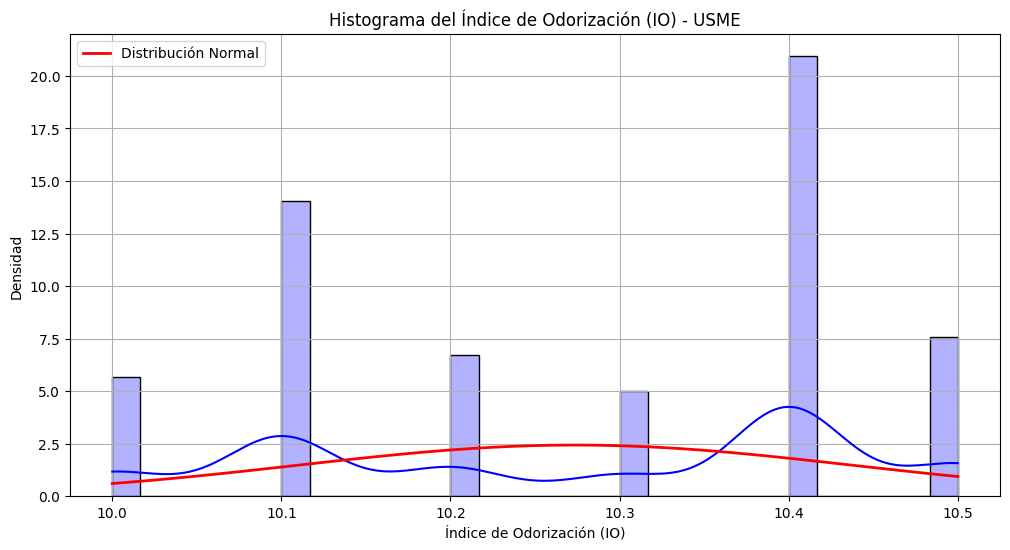

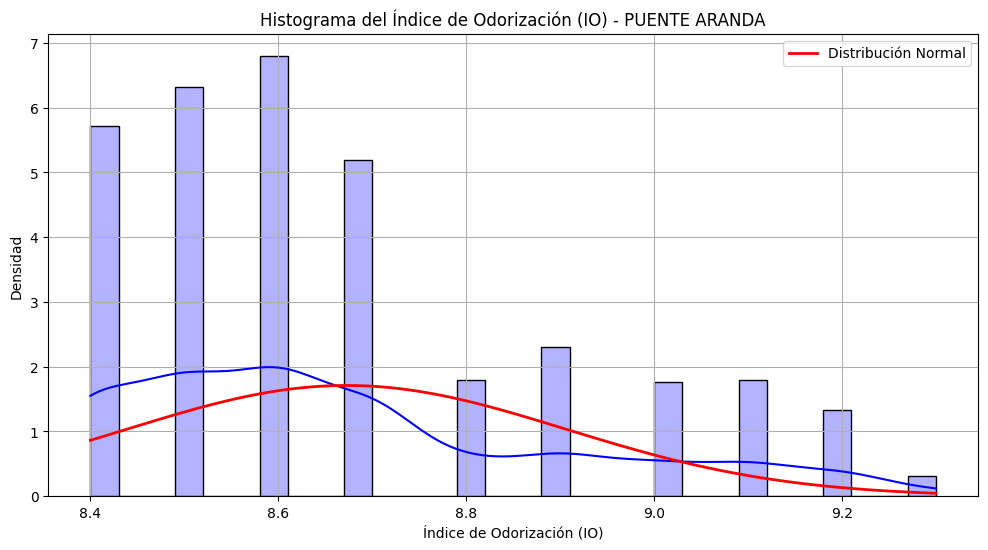

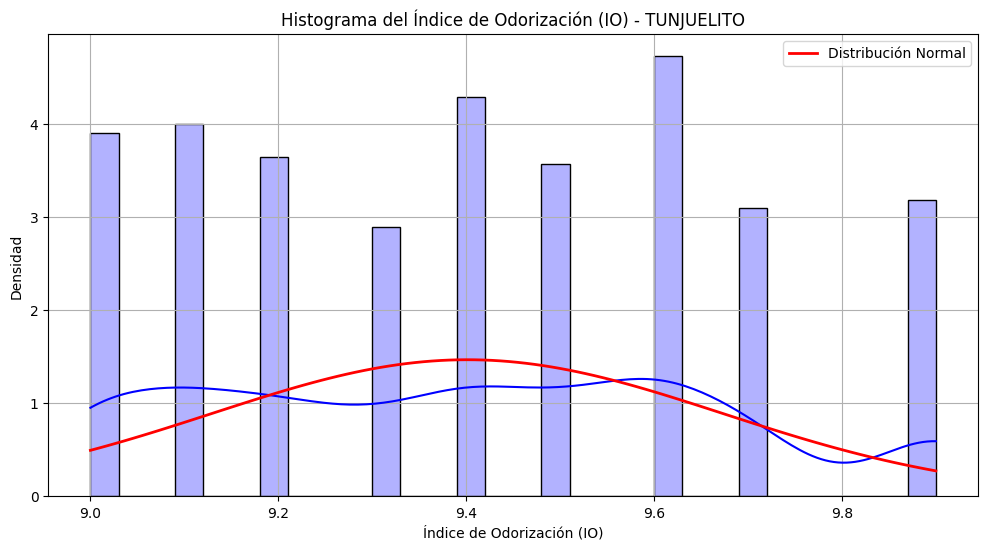

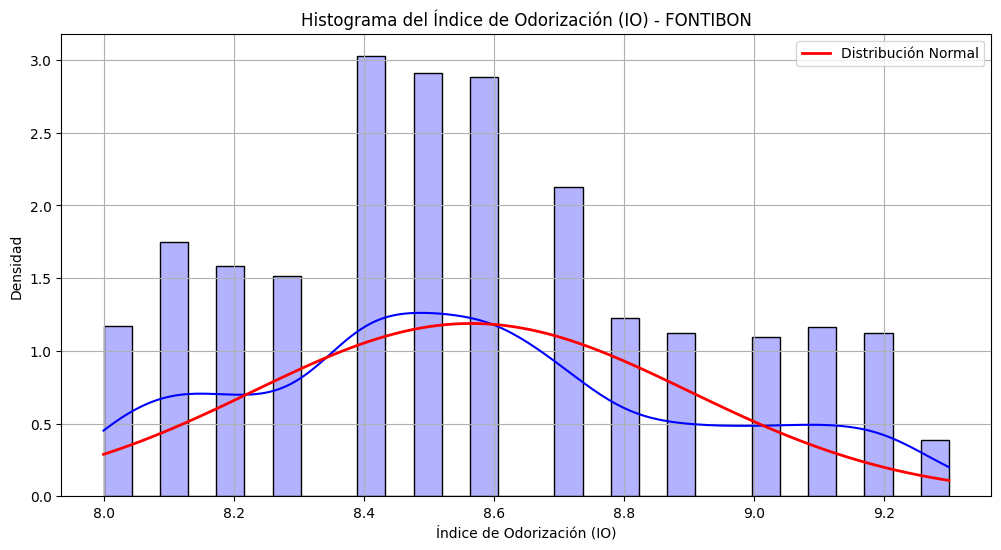

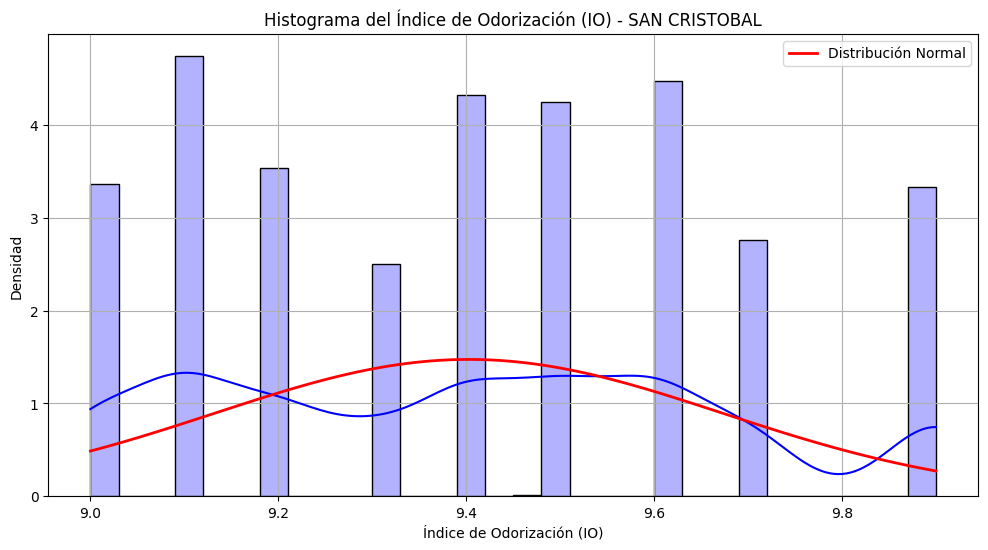

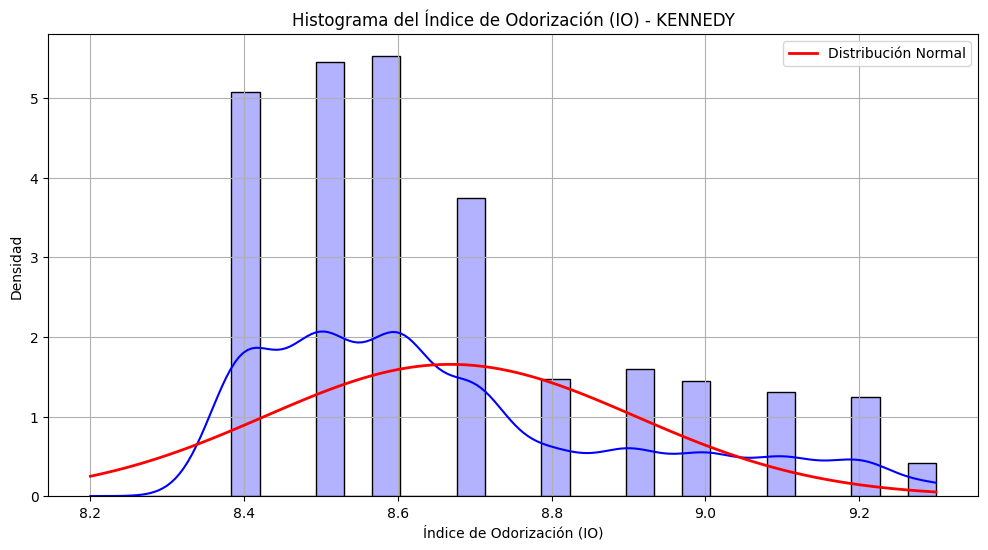

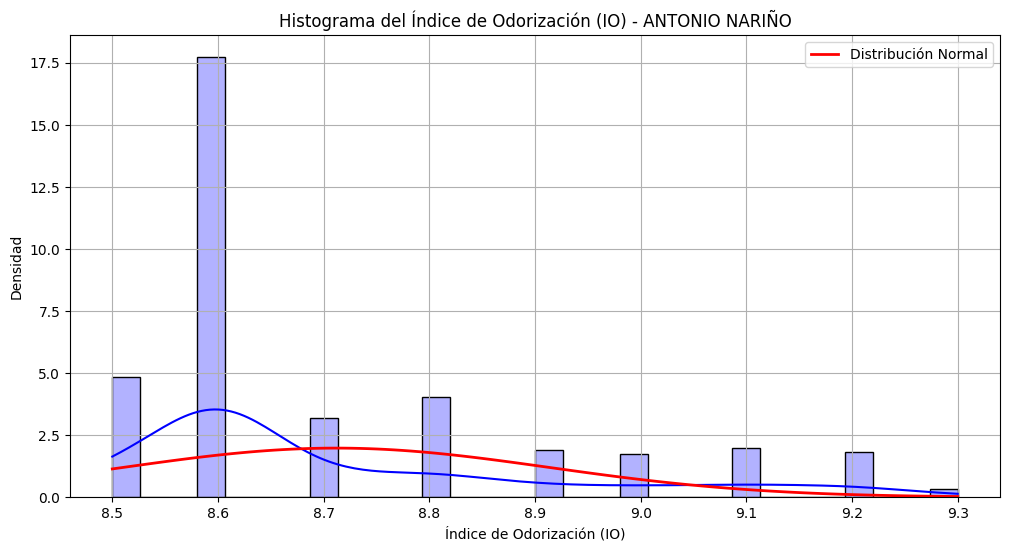

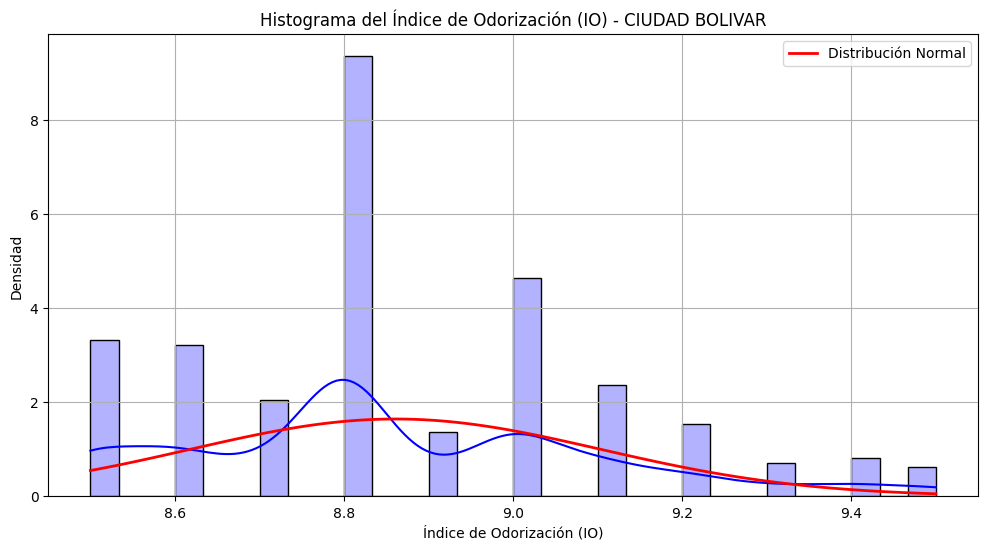

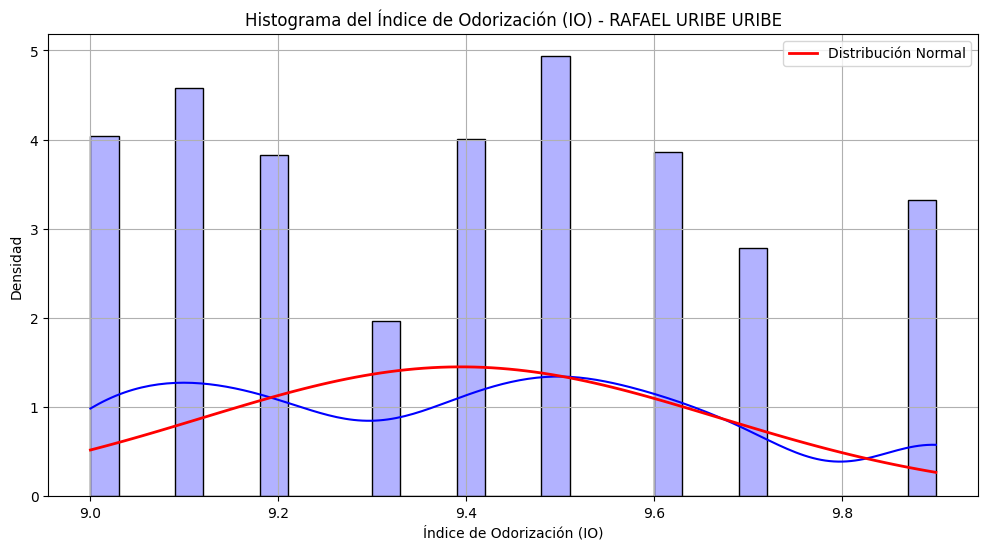

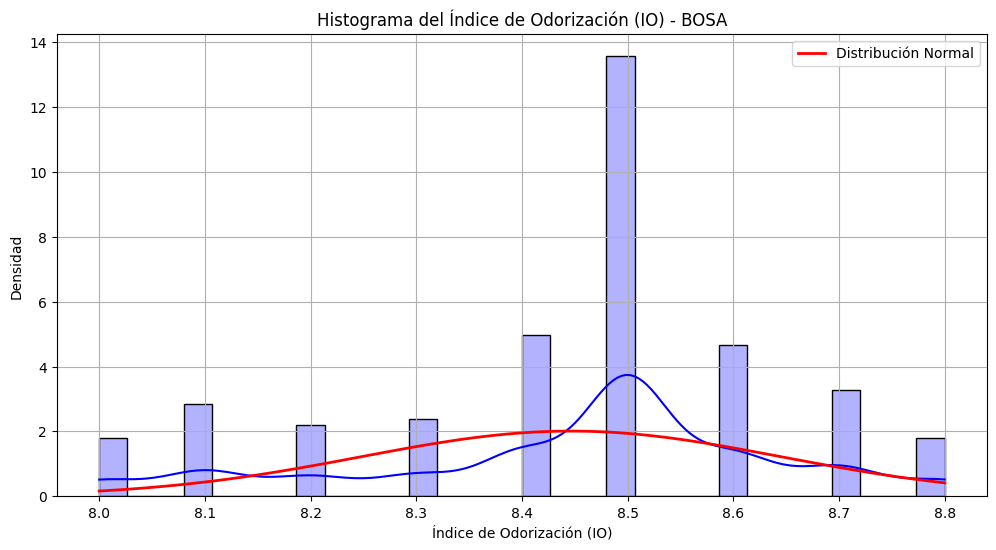

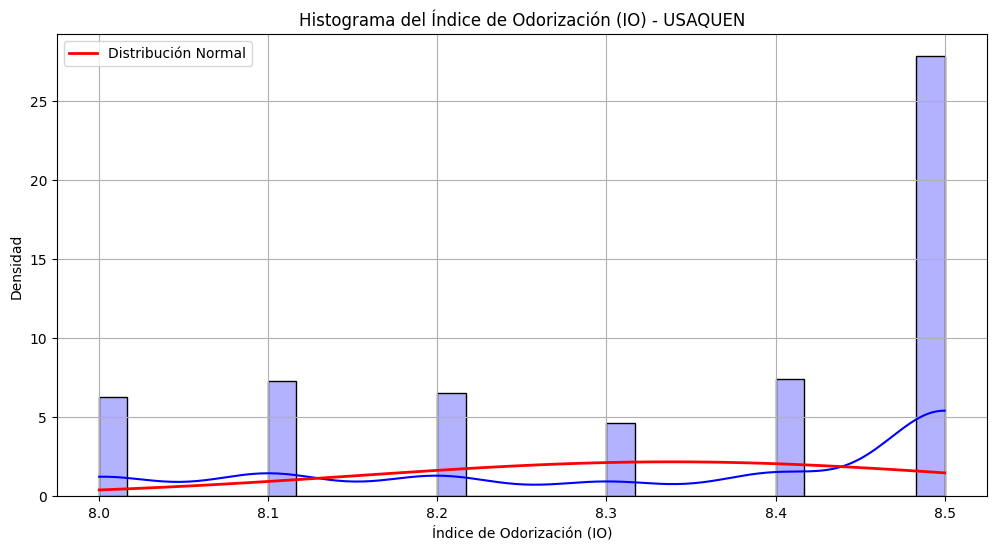

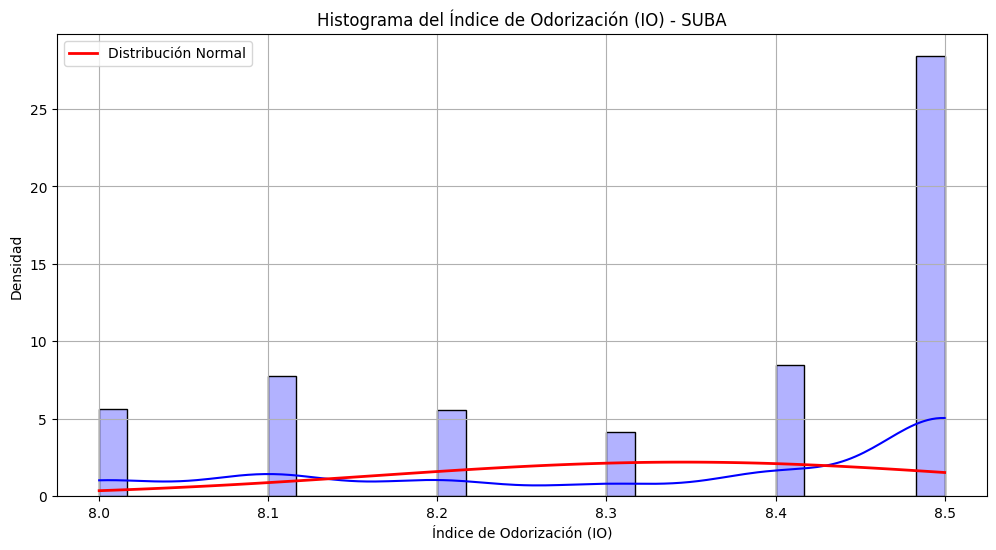

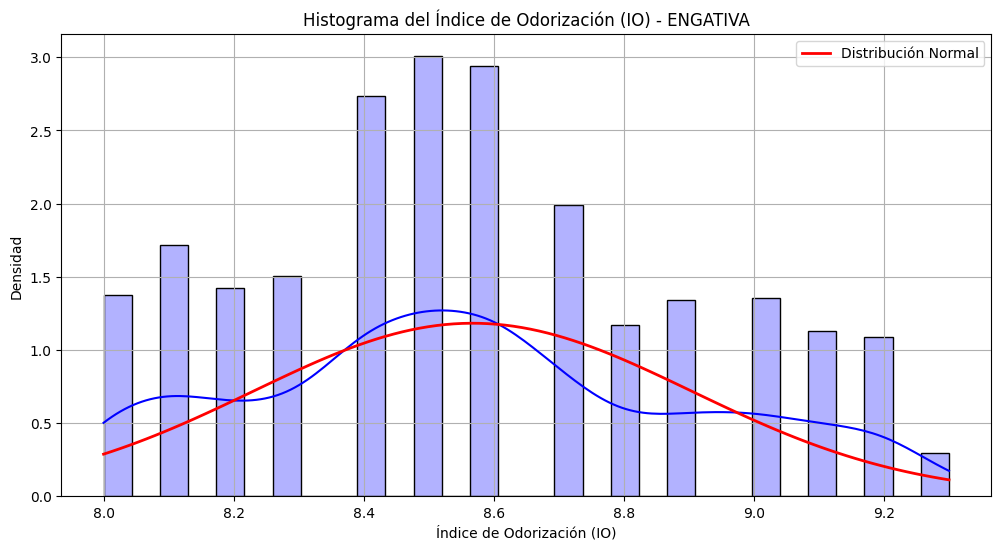

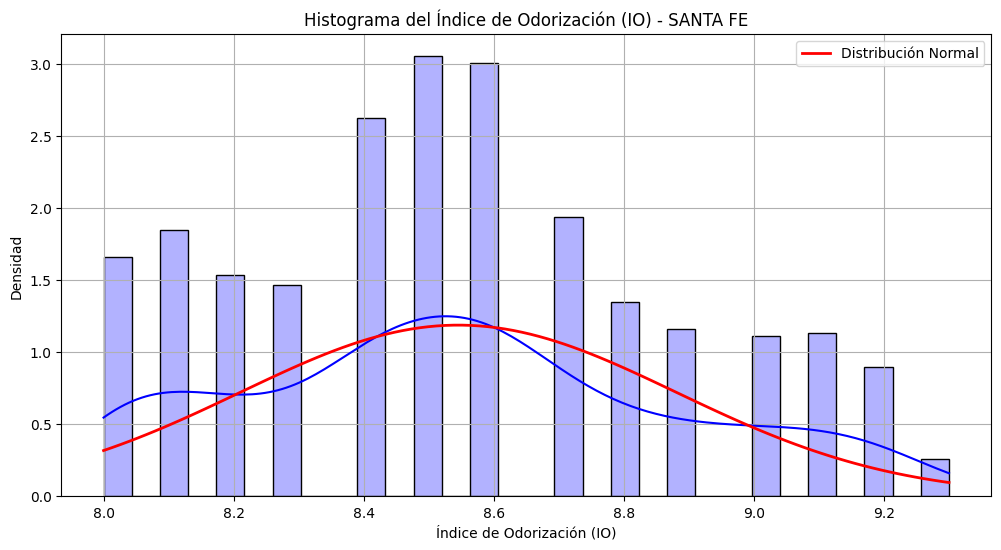

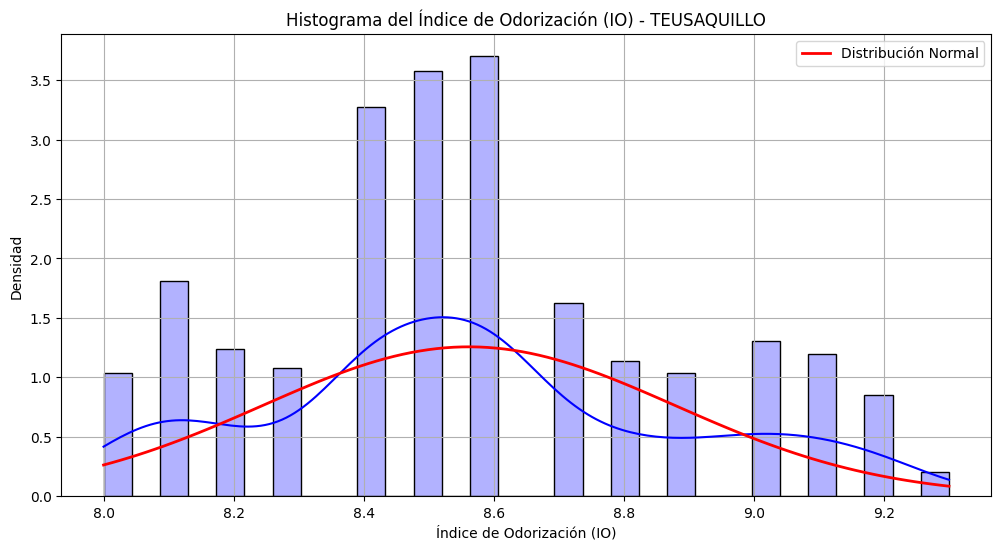

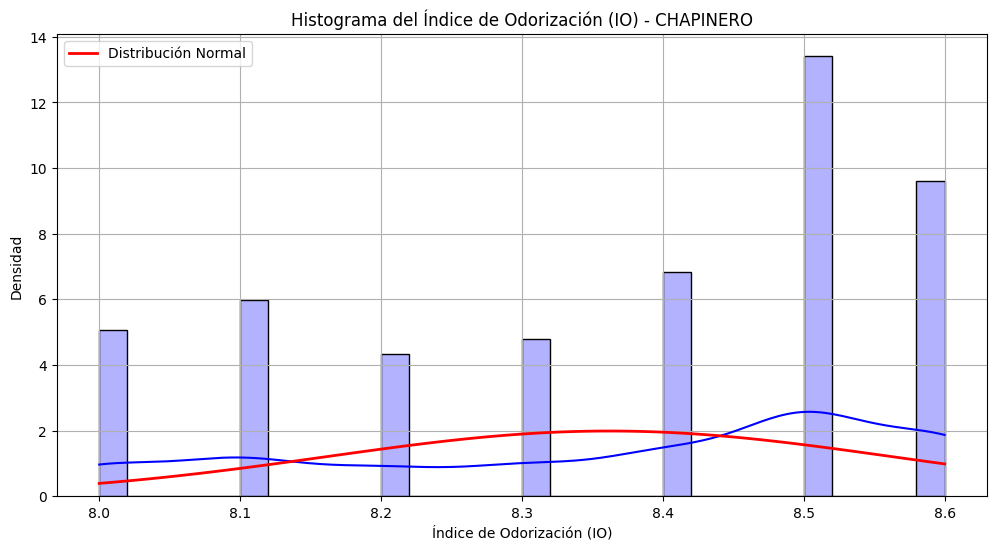

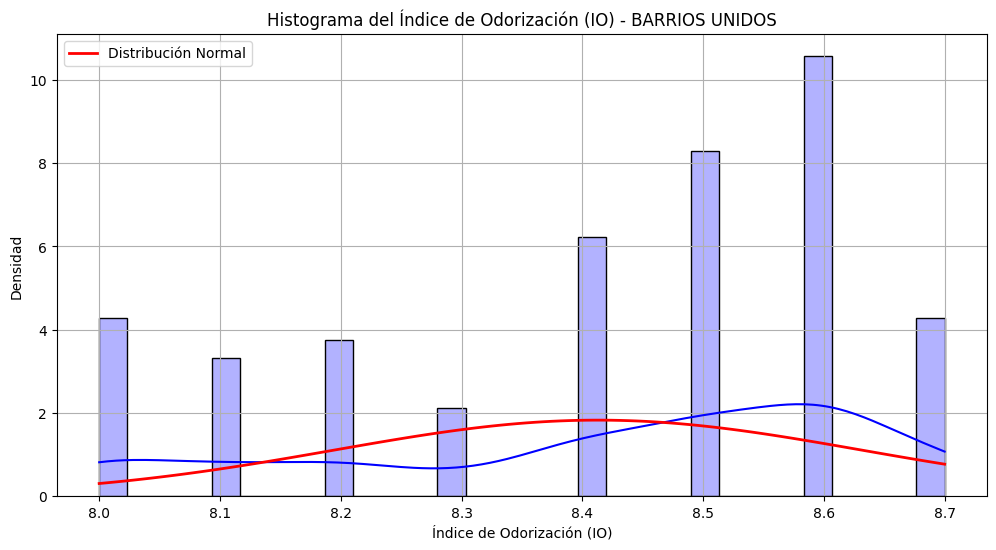

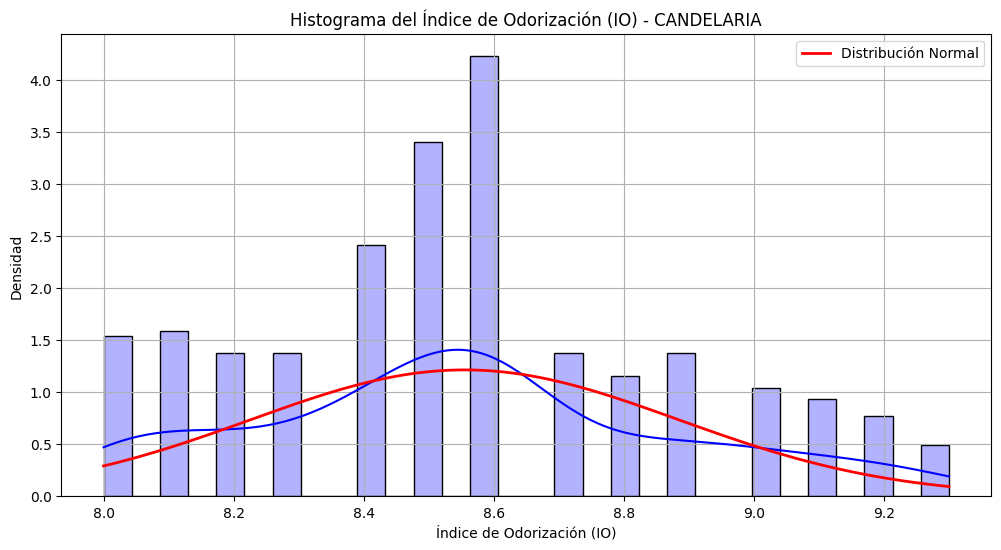

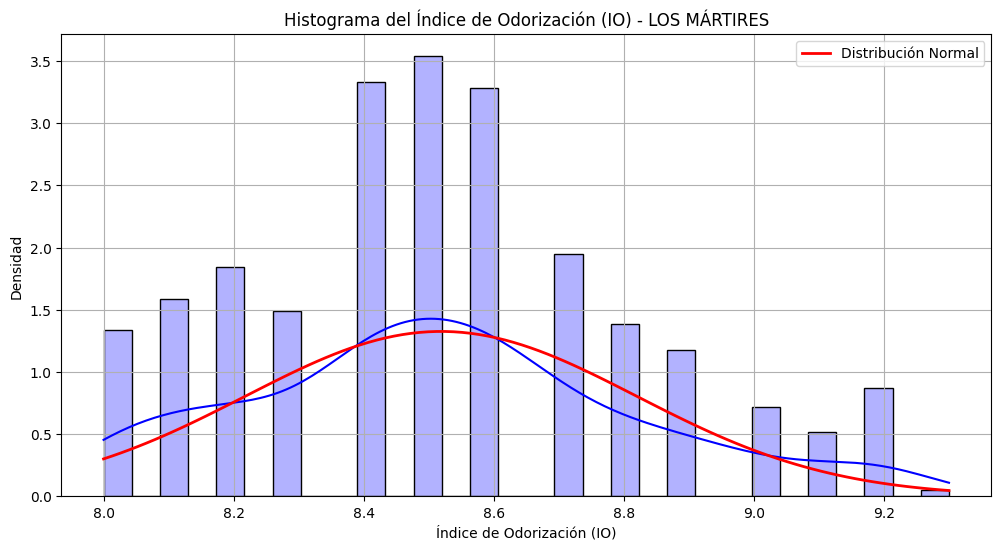

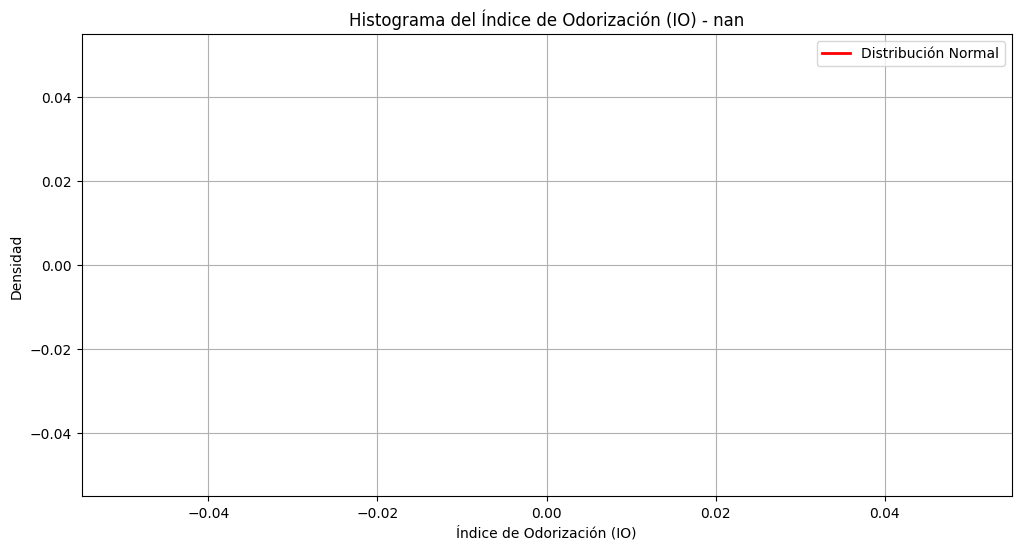

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

if 'IO' in datos.columns and 'LOCALIDAD' in datos.columns:
    # Crear gráficos por cada localidad
    localidades = datos['LOCALIDAD'].unique()

    for localidad in localidades:
        plt.figure(figsize=(12, 6))  # Figura por localidad
        datos_localidad = datos[datos['LOCALIDAD'] == localidad]

        # media y la desviación estándar
        media = datos_localidad['IO'].mean()
        desviacion_estandar = datos_localidad['IO'].std()

        # Histograma del Índice de Odorización
        sns.histplot(datos_localidad['IO'], bins=30, kde=True, stat='density', color='blue', alpha=0.3)

        # Graficar la curva de distribución normal
        x = np.linspace(datos_localidad['IO'].min(), datos_localidad['IO'].max(), 100)
        y = (1 / (desviacion_estandar * np.sqrt(2 * np.pi))) * np.exp(-0.5 * ((x - media) / desviacion_estandar) ** 2)

        plt.plot(x, y, color='red', label='Distribución Normal', linewidth=2)

        # Configurar la gráfica
        plt.title(f'Histograma del Índice de Odorización (IO) - {localidad}')
        plt.xlabel('Índice de Odorización (IO)')
        plt.ylabel('Densidad')
        plt.legend()
        plt.grid(True)

        # Mostrar la gráfica
        plt.show()
else:
    print("\Las columnas 'IO' y/o 'LOCALIDAD' no se encuentran en el DataFrame.")



MAPA DE CALOR

In [17]:
import folium
from folium.plugins import HeatMap

# Limpiar los nombres de las columnas para eliminar espacios
datos.columns = datos.columns.str.strip()

# Filtrar los datos para que solo incluyan el Índice de Odorización entre 8 y 11
datos_filtrados = datos[(datos['IO'] >= 7.9) & (datos['IO'] <= 11)]

# Crear un mapa base centrado en una coordenada promedio
mapa = folium.Map(location=[datos_filtrados['LATITUD'].mean(), datos_filtrados['LONGITUD'].mean()], zoom_start=12)

# Crear un mapa de calor utilizando el Índice de Odorización como peso
heat_data = []

# Asignar colores según los rangos de IO
for index, row in datos_filtrados.iterrows():
    if row['IO'] > 9.5:
        color_value = 1.0 #purple
    elif 8.5 <= row['IO'] <= 9.5:
        color_value = 0.5  # red
    else:
        color_value = 0.0 # yellow
    heat_data.append([row['LATITUD'], row['LONGITUD'], color_value])

# Crear el mapa de calor
HeatMap(heat_data, radius=15, gradient={0: 'yellow', 0.5: 'RED', 1: 'purple'}).add_to(mapa)

# Mostrar el mapa en un Jupyter Notebook (opcional)
mapa




MAPA CON INDICADOR DE UBICACIÓN

In [18]:
# Filtrar los datos para que solo incluyan el Índice de Odorización entre 8 y 11
datos_filtrados = datos[(datos['IO'] >= 7.9) & (datos['IO'] <= 11)]

# Crear un mapa base centrado en una coordenada promedio
mapa = folium.Map(location=[datos_filtrados['LATITUD'].mean(), datos_filtrados['LONGITUD'].mean()], zoom_start=12)

# Crear un mapa de calor utilizando el Índice de Odorización como peso
heat_data = []

# Asignar colores según los rangos de IO y calcular promedio por ubicación
promedios_por_ubicacion = datos_filtrados.groupby(['LATITUD', 'LONGITUD'])['IO'].mean().reset_index()

# Asignar colores según los rangos de IO y construir el heat_data
for index, row in promedios_por_ubicacion.iterrows():
    if row['IO'] > 9.5:
        color_value = 1.0  # Rojo
    elif 8.5 <= row['IO'] <= 9.5:
        color_value = 0.5  # Naranja
    else:
        color_value = 0.0  # Amarillo
    heat_data.append([row['LATITUD'], row['LONGITUD'], color_value])

    # Agregar un marcador con el promedio de IO
    folium.Marker(
        location=[row['LATITUD'], row['LONGITUD']],
        popup=f'Promedio IO: {row["IO"]:.2f}',
        icon=folium.Icon(color='blue')
    ).add_to(mapa)

# Crear el mapa de calor
HeatMap(heat_data, radius=15, gradient={0: 'yellow', 0.5: 'orange', 1: 'red'}).add_to(mapa)

# Mostrar el mapa en un Jupyter Notebook (opcional)
mapa


RELACIÓN ENTRE DISTANCIA E IO


Correlación entre el Índice de Odorización (IO) y la Distancia: -0.7747692858137953


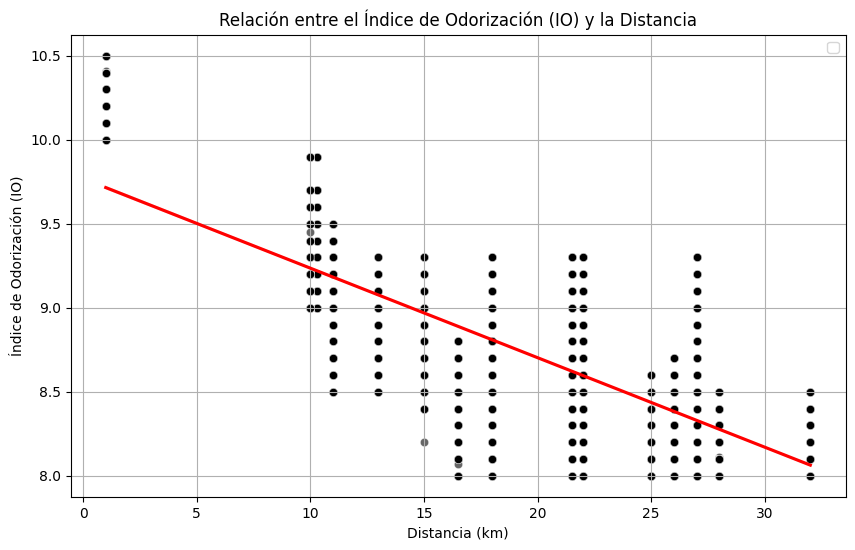

In [19]:


# Verificar columnas
if 'IO' in datos.columns and 'DISTANCIA' in datos.columns:
    # Calcular la correlación entre IO y DISTANCIA
    correlacion = datos[['IO', 'DISTANCIA']].corr().iloc[0, 1]
    print(f"\nCorrelación entre el Índice de Odorización (IO) y la Distancia: {correlacion}")

    # Graficar la relación entre IO y DISTANCIA
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x='DISTANCIA', y='IO', data=datos, color='black', alpha=0.6)

    # Ajustar una línea de regresión
    sns.regplot(x='DISTANCIA', y='IO', data=datos, scatter=False, color='red', line_kws={"label": "Línea de Regresión"})

    # Configurar la gráfica
    plt.title('Relación entre el Índice de Odorización (IO) y la Distancia')
    plt.xlabel('Distancia (km)')
    plt.ylabel('Índice de Odorización (IO)')
    plt.legend()
    plt.grid(True)
    plt.show()
else:
    print("\nLas columnas 'IO' y/o 'DISTANCIA' no se encuentran en el DataFrame.")


 Conclusión: A mayor distancia, más perdida de IO

BOXPLOT ENTRE LOCALIDAD e IO SIN TENER EN CUENTA LOS AÑOS

In [20]:
print(datos['LOCALIDAD'].unique())

['USME' 'PUENTE ARANDA' 'TUNJUELITO' 'FONTIBON' 'SAN CRISTOBAL' 'KENNEDY'
 'ANTONIO NARIÑO' 'CIUDAD BOLIVAR' 'RAFAEL URIBE URIBE' 'BOSA' 'USAQUEN'
 'SUBA' 'ENGATIVA' 'SANTA FE' 'TEUSAQUILLO' 'CHAPINERO' 'BARRIOS UNIDOS'
 'CANDELARIA' 'LOS MÁRTIRES' nan]


In [21]:
datos = datos.dropna(subset=['LOCALIDAD'])

In [22]:
import unicodedata

# Función para normalizar las cadenas de texto
def normalize_string(s):
    return ''.join(c for c in unicodedata.normalize('NFD', s) if unicodedata.category(c) != 'Mn')

# Aplicar la normalización a la columna "LOCALIDAD"
datos['LOCALIDAD'] = datos['LOCALIDAD'].apply(normalize_string)

# Verifica los cambios
print(datos['LOCALIDAD'].unique())

['USME' 'PUENTE ARANDA' 'TUNJUELITO' 'FONTIBON' 'SAN CRISTOBAL' 'KENNEDY'
 'ANTONIO NARINO' 'CIUDAD BOLIVAR' 'RAFAEL URIBE URIBE' 'BOSA' 'USAQUEN'
 'SUBA' 'ENGATIVA' 'SANTA FE' 'TEUSAQUILLO' 'CHAPINERO' 'BARRIOS UNIDOS'
 'CANDELARIA' 'LOS MARTIRES']


In [23]:
datos = datos.dropna(subset=['LOCALIDAD', 'IO'])

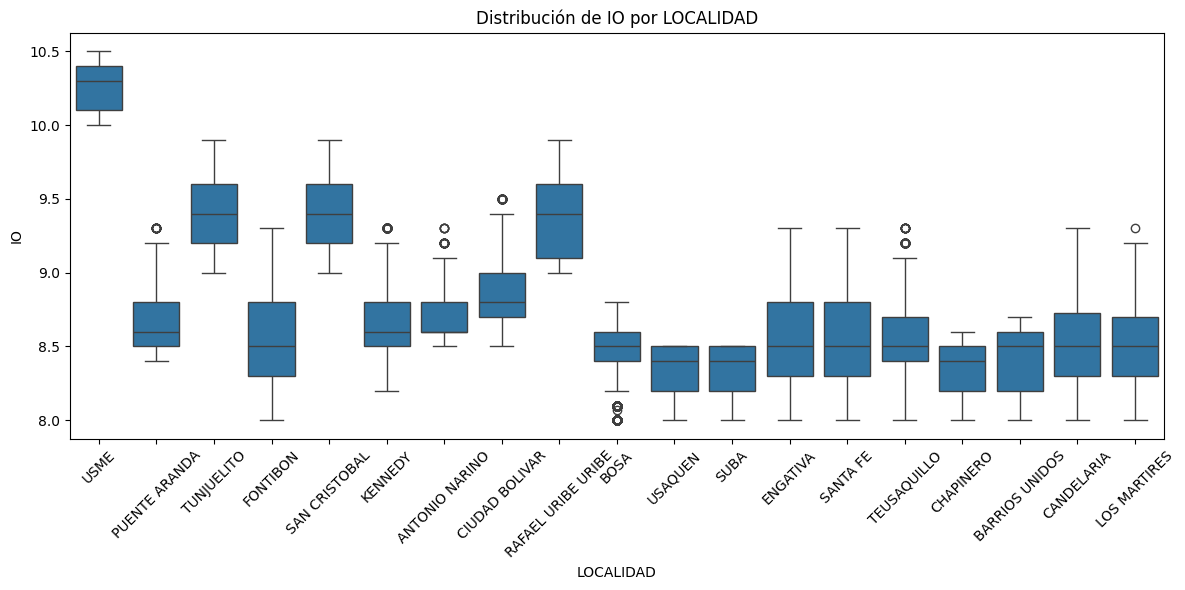

In [24]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='LOCALIDAD', y='IO', data=datos)

plt.xlabel('LOCALIDAD')
plt.ylabel('IO')
plt.title('Distribución de IO por LOCALIDAD')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

DISTRIBUCIÓN DE IO POR AÑO

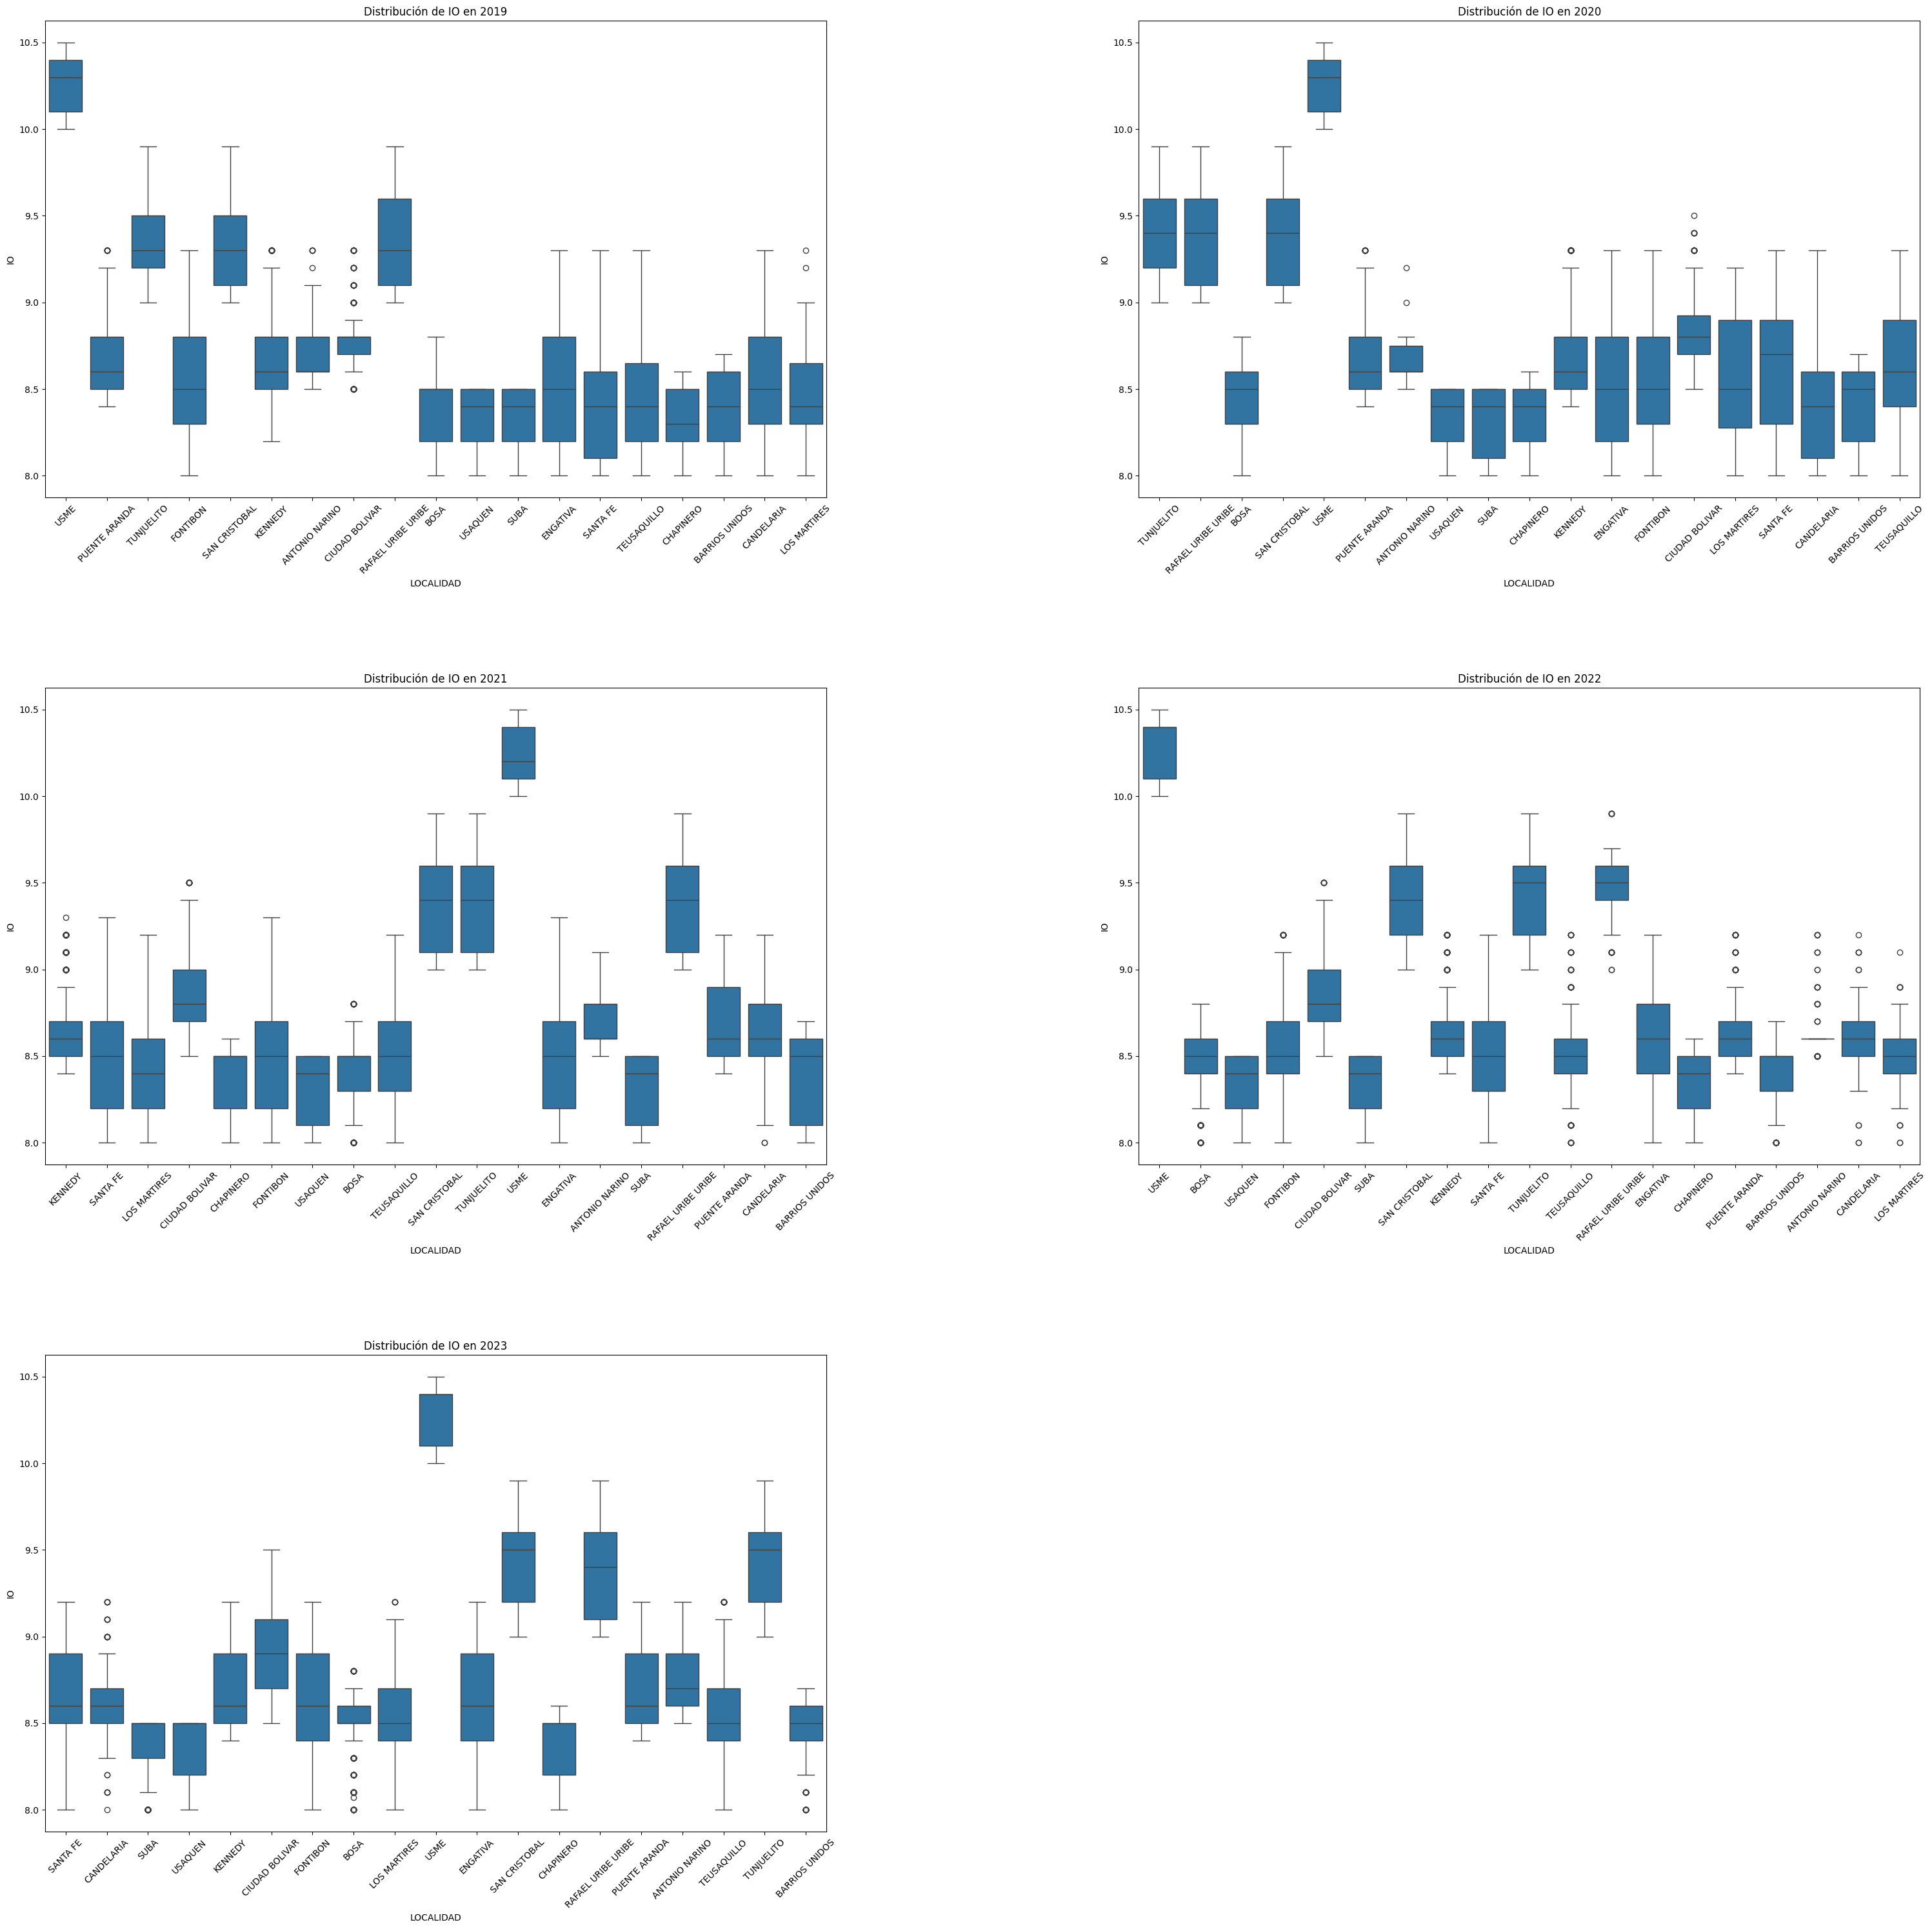

In [25]:
datos['FECHA'] = pd.to_datetime(datos['FECHA'])

# Extraer el año de la columna 'FECHA'
datos['AÑO'] = datos['FECHA'].dt.year

# Obtener los años únicos
anios_unicos = datos['AÑO'].unique()

# Crear una figura con más espacio
plt.figure(figsize=(30, 30))

# Crear un gráfico por cada año
for i, anio in enumerate(anios_unicos):
    plt.subplot(3, 2, i + 1)  # Crear un subplot en una cuadrícula de 3 filas y 2 columnas
    sns.boxplot(x='LOCALIDAD', y='IO', data=datos[datos['AÑO'] == anio])

    plt.title(f'Distribución de IO en {anio}')
    plt.xlabel('LOCALIDAD')
    plt.ylabel('IO')
    plt.xticks(rotation=45)
    plt.tight_layout()

# Ajustar el layout para que no se vean amontonados
plt.subplots_adjust(hspace=0.4, wspace=0.4)
plt.show()




19 LOCALIDADES DE BOGOTÁ POR POLÍGONOS

In [ ]:
!pip install geopandas mapclassify
import geopandas as gpd
import matplotlib.pyplot as plt

# CARGAR ARCHIVO GEOJSON
from google.colab import files
uploaded = files.upload()

gdf = gpd.read_file('/content/poligonos-localidades (1).geojson')

print("Información del GeoDataFrame:")
print(gdf.info())
print("\nPrimeras filas:")
print(gdf.head())

# 6. Visualizar el polígono
fig, ax = plt.subplots(figsize=(15, 10))
gdf.plot(ax=ax)
plt.title('Visualización del Polígono')
ax.axis('equal')
plt.show()

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.1/59.1 kB 2.2 MB/s eta 0:00:00


DATAFRAME POR LOCALIDAD

In [ ]:
# Crear un diccionario para almacenar los DataFrames de cada localidad
localidades_dataframes = {}

# Lista para almacenar los nombres de los DataFrames creados
dataframe_names = []

# Iterar sobre cada fila del GeoDataFrame
for index, row in gdf.iterrows():
    # Obtener el nombre de la localidad (ajustar 'Nombre de la localidad' como la columna correcta)
    localidad = row['Nombre de la localidad'].upper()  # Usar el nombre correcto de la columna

    # Asegurarse de que el nombre de la localidad sea válido para el nombre de la variable
    localidad = localidad.replace(" ", "_").replace("-", "_")  # Reemplaza espacios y guiones por guiones bajos

    # Obtener las coordenadas del polígono (suponiendo que la geometría es un polígono o multipolígono)
    geom = row['geometry']

    # Si es un Multipolígono, extraemos los vértices de cada polígono
    if geom.geom_type == 'MultiPolygon':
        vertices = []
        for polygon in geom.geoms:  # Usamos .geoms para acceder a los polígonos dentro de un MultiPolygon
            # Obtener los vértices del polígono y agregarlos a la lista
            for coord in polygon.exterior.coords:
                vertices.append(coord)
    elif geom.geom_type == 'Polygon':
        # Si es un polígono simple, obtenemos los vértices
        vertices = list(geom.exterior.coords)
    else:
        vertices = []

    # Crear un DataFrame con los vértices
    df_localidad = pd.DataFrame(vertices, columns=['LONGITUD', 'LATITUD'])

    # Añadir una nueva columna con el nombre de la localidad (sin el prefijo 'LOCALIDAD_')
    df_localidad['LOCALIDAD'] = localidad  # Solo el nombre de la localidad

    # Cambiar el título de la columna 'LOCALIDAD' para que tenga el formato 'LOCALIDAD_<nombre>'
    df_localidad = df_localidad.rename(columns={'LOCALIDAD': f'LOCALIDAD_{localidad}'})

    # Reordenar las columnas para que 'LOCALIDAD_<nombre>' esté primero
    df_localidad = df_localidad[[f'LOCALIDAD_{localidad}', 'LONGITUD', 'LATITUD']]

    # Modificar el contenido de la primera columna para que no tenga guiones bajos
    df_localidad[f'LOCALIDAD_{localidad}'] = df_localidad[f'LOCALIDAD_{localidad}'].str.replace('_', ' ')  # Eliminar los guiones bajos del contenido

    # Almacenar el DataFrame de la localidad en el diccionario
    localidades_dataframes[localidad] = df_localidad

    # Crear una variable dinámica con el nombre de la localidad
    globals()[f"df_{localidad}"] = df_localidad

    # Agregar el nombre del DataFrame a la lista
    dataframe_names.append(f"df_{localidad}")

# Imprimir la lista de nombres de DataFrames en formato vertical
for name in dataframe_names:
    print(name)


In [ ]:
df_RAFAEL_URIBE_URIBE

INDICADOR ÚNICO POR LOCALIDAD SEGÚN GEODATAFRAME

In [ ]:
# Crear lista de tuplas con los valores de las dos columnas
data = list(zip(gdf['Identificador unico de la localidad'], gdf['Nombre de la localidad']))

# Crear el DataFrame
df = pd.DataFrame(data, columns=['Identificador unico de la localidad', 'Nombre de la localidad'])

# Mostrar el DataFrame
print(df)


CUANTOS VÉRTICES O COORDENADAS ESTÁ COMPUESTA CADA LOCALIDAD

In [ ]:
import pandas as pd

# Crear una lista vacía para almacenar la información
localidades = []
vertices = []

# Recorrer cada polígono en el GeoDataFrame
for _, row in gdf.iterrows():
    # Obtener el nombre de la localidad
    nombre_localidad = row['Nombre de la localidad']

    # Obtener los vértices del polígono (listado de coordenadas)
    if row.geometry.geom_type == 'Polygon':
        # Si es un polígono simple, contar los vértices del contorno exterior
        num_vertices = len(row.geometry.exterior.coords)
    elif row.geometry.geom_type == 'MultiPolygon':
        # Si es un MultiPolygon, contar los vértices de cada uno de los polígonos
        num_vertices = sum(len(polygon.exterior.coords) for polygon in row.geometry.geoms)

    # Agregar los datos a las listas
    localidades.append(nombre_localidad)
    vertices.append(num_vertices)

# Crear el DataFrame
df_localidades = pd.DataFrame({
    'Nombre de la localidad': localidades,
    'Cantidad de vértices o coordenadas': vertices
})

# Mostrar el DataFrame
print(df_localidades)

El número de coordenadas aleatorias depende de la cantidad de coordenadas reales de cada localidad, es decir, no es lo mismo TEUSAQUILLO a CANDELARIA

ELEGIR LA LOCALIDAD A TRABAJAR

In [ ]:
import ipywidgets as widgets
from IPython.display import display
import geopandas as gpd
from shapely.geometry import MultiPolygon, Polygon
import pandas as pd

# Crear lista de tuplas con los valores de las dos columnas
data = list(zip(gdf['Identificador unico de la localidad'], gdf['Nombre de la localidad']))

# Crear el DataFrame
df = pd.DataFrame(data, columns=['Identificador unico de la localidad', 'Nombre de la localidad'])

# Asegurarse de que el identificador sea del tipo adecuado (convertir a entero)
df['Identificador unico de la localidad'] = df['Identificador unico de la localidad'].astype(int)

# Crear una lista con los nombres de las localidades
localidades_lista = df['Nombre de la localidad'].tolist()

# Crear el widget desplegable
dropdown = widgets.Dropdown(
    options=localidades_lista,  # Usar la lista de nombres de localidad como opciones
    description='Localidad:',
    disabled=False
)

# Crear el diccionario de polígonos
dict_poligonos = {row['Nombre de la localidad']: row.geometry for idx, row in gdf.iterrows()}

# Función para visualizar los MultiPolygons de una localidad específica (solo información, sin graficar)
def visualizar_multipoligonos_localidad(gdf, nombre_localidad):
    # Obtener el polígono de la localidad
    poligono = dict_poligonos[nombre_localidad]

    # Solo imprimir la información de los MultiPolygons o polígonos simples
    if isinstance(poligono, MultiPolygon):
        print(f"La localidad {nombre_localidad} está compuesta por {len(poligono.geoms)} MultiPolygons")

        # Imprimir la información de cada MultiPolygon
        for i, multipoly in enumerate(poligono.geoms):
            print(f"\nMultiPolygon {i+1}:")
            print(f"Área: {multipoly.area:.2f}")
            print(f"Perímetro: {multipoly.length:.2f}")
            print(f"Número de vértices o coordenadas: {len(list(multipoly.exterior.coords))}")

    elif isinstance(poligono, Polygon):
        print(f"La localidad {nombre_localidad} es un polígono simple")
        print(f"\nÁrea: {poligono.area:.2f}")
        print(f"Perímetro: {poligono.length:.2f}")
        print(f"Número de vértices o coordenadas: {len(list(poligono.exterior.coords))}")

# Función para manejar la selección y mostrar la información de la localidad
def on_select(change):
    localidad_seleccionada = change.new
    identificador = df[df['Nombre de la localidad'] == localidad_seleccionada]['Identificador unico de la localidad'].values[0]
    print(f"Has seleccionado la localidad: {localidad_seleccionada} con el identificador único: {identificador}")

    # Mostrar la información de los polígonos de la localidad seleccionada
    visualizar_multipoligonos_localidad(gdf, localidad_seleccionada)

    # Guardar la localidad seleccionada en la variable
    global LOCALIDAD_A_PROYECTAR
    LOCALIDAD_A_PROYECTAR = localidad_seleccionada

# Conectar el evento de selección del desplegable a la función
dropdown.observe(on_select, names='value')

# Mostrar el desplegable
display(dropdown)



INFORMACIÓN DEL POLIGONO

In [ ]:
poligono_individual = gdf.loc[gdf['Nombre de la localidad'] == LOCALIDAD_A_PROYECTAR]
poligono_individual

POLIGONO GRAFICADO

In [ ]:

# Visualizar el polígono individual
fig, ax = plt.subplots(figsize=(10, 10))
poligono_individual.plot(ax=ax, color='red')
plt.title(f'Polígono de la localidad')
ax.axis('equal')
plt.show()

# Método 3: Crear un diccionario de polígonos
# Usar 'Nombre de la localidad' para la clave y 'geometry' para el valor
dict_poligonos = {row['Nombre de la localidad']: row.geometry for idx, row in gdf.iterrows()}

poligono_especifico = dict_poligonos[LOCALIDAD_A_PROYECTAR]

MOSTRAR VÉRTICES O COORDENADAS DEL POLIGONO O LOCALIDAD

In [ ]:
import geopandas as gpd
from shapely.geometry import MultiPolygon, Polygon

# Función para mostrar los vértices de un polígono complejo (Polygon o MultiPolygon)
def mostrar_vertices_poligono(gdf, nombre_localidad):
    # Obtener el polígono de la localidad
    poligono = gdf.loc[gdf['Nombre de la localidad'] == nombre_localidad, 'geometry'].values[0]

    # Verificar si el polígono es un MultiPolygon o un Polygon simple
    if isinstance(poligono, MultiPolygon):
        print(f"La localidad {nombre_localidad} es un MultiPolygon compuesto por {len(poligono.geoms)} subpolígonos.")

        # Mostrar los vértices de cada subpolígono dentro del MultiPolygon
        for i, multipoly in enumerate(poligono.geoms):
            print(f"\nVértices del Subpolígono {i + 1}:")
            for coord in multipoly.exterior.coords:
                print(coord)

    elif isinstance(poligono, Polygon):
        print(f"La localidad {nombre_localidad} es un Polígono simple.")
        # Mostrar los vértices del polígono simple
        print("\nVértices del Polígono:")
        for coord in poligono.exterior.coords:
            print(coord)
    else:
        print(f"La geometría de la localidad {nombre_localidad} no es un Polygon ni un MultiPolygon.")

mostrar_vertices_poligono(gdf, LOCALIDAD_A_PROYECTAR)

COORDENADAS ALEATORIAS DEL POLIGONO O LOCALIDAD DATAFRAME Y GRAFICADOS

In [ ]:
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np
from shapely.geometry import Point, MultiPolygon
import pandas as pd  # Importar pandas, ya que se usa en el código

def generar_puntos_aleatorios(poligono, n_puntos=50):
    """
    Genera puntos aleatorios dentro de un polígono

    Parámetros:
    poligono: Geometría del polígono (Polygon o MultiPolygon)
    n_puntos: Número de puntos a generar
    """
    # Obtener los límites del polígono
    minx, miny, maxx, maxy = poligono.bounds

    # Lista para almacenar los puntos válidos
    puntos_validos = []

    while len(puntos_validos) < n_puntos:
        # Generar punto aleatorio
        x = np.random.uniform(minx, maxx)
        y = np.random.uniform(miny, maxy)
        punto = Point(x, y)

        # Verificar si el punto está dentro del polígono
        if poligono.contains(punto):
            puntos_validos.append(punto)

    return puntos_validos

def visualizar_puntos_en_poligono(gdf, nombre_localidad, n_puntos=50):
    # Obtener el polígono
    poligono = dict_poligonos[nombre_localidad]

    # Generar puntos aleatorios
    puntos = generar_puntos_aleatorios(poligono, n_puntos)

    # Crear GeoDataFrame con los puntos
    gdf_puntos = gpd.GeoDataFrame(geometry=puntos)

    # Visualización solo con el gráfico de puntos numerados
    fig, ax = plt.subplots(figsize=(10, 10))

    # Subplot: Polígono con puntos numerados
    gpd.GeoSeries([poligono]).plot(ax=ax, color='lightgrey', alpha=0.5)
    gdf_puntos.plot(ax=ax, color='red', markersize=50)

    # Añadir números a los puntos
    for idx, point in enumerate(puntos):
        ax.annotate(f'{idx+1}', xy=(point.x, point.y),
                    xytext=(3, 3), textcoords='offset points')

    ax.set_title('Ubicaciones numeradas')

    # Ajustar los ejes
    ax.axis('equal')

    plt.tight_layout()
    plt.show()

    # Crear DataFrame con las coordenadas
    coordenadas = [(idx+1, point.x, point.y) for idx, point in enumerate(puntos)]
    df_coordenadas = pd.DataFrame(coordenadas, columns=['ID', 'LONGITUD', 'LATITUD'])

    print("\nCoordenadas de las ubicaciones:")
    print(df_coordenadas)

    return df_coordenadas, gdf_puntos

# Generar y visualizar los puntos para la localidad
df_coordenadas, gdf_puntos = visualizar_puntos_en_poligono(gdf, LOCALIDAD_A_PROYECTAR, 50)


DATAFRAME CON COORDENADAS ALEATORIAS

In [ ]:
# Asignamos el valor original de LOCALIDAD_A_PROYECTAR a la columna 'LOCALIDAD'
ALEATORIOS = df_coordenadas.iloc[:, 1:]
ALEATORIOS['LOCALIDAD'] = LOCALIDAD_A_PROYECTAR

# Renombramos la columna 'LOCALIDAD' para incluir el valor de LOCALIDAD_A_PROYECTAR en su nombre
ALEATORIOS = ALEATORIOS.rename(columns={'LOCALIDAD': 'LOCALIDAD_' + str(LOCALIDAD_A_PROYECTAR)})

# Reorganizamos las columnas para asegurar que la nueva columna 'LOCALIDAD_*' esté al principio
columnas = ['LOCALIDAD_' + str(LOCALIDAD_A_PROYECTAR)] + [col for col in ALEATORIOS.columns if col != 'LOCALIDAD_' + str(LOCALIDAD_A_PROYECTAR)]
ALEATORIOS6 = ALEATORIOS[columnas]

# Mostramos el resultado
ALEATORIOS6



In [ ]:
ALEATORIOS6.dtypes

MODELO A ELEGIR

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.impute import SimpleImputer

# Crear una nueva columna 'AÑO' para facilitar la división de datos
datos['AÑO'] = datos['FECHA'].dt.year

# Dividir en datos de entrenamiento (antes de 2023) y de prueba (2023)
datos_entrenamiento = datos[datos['AÑO'] < 2023]
datos_prueba = datos[datos['AÑO'] == 2023]

# Definir variables independientes (X) y dependientes (y)
X_entrenamiento = datos_entrenamiento.drop(columns=['IO', 'FECHA'])
y_entrenamiento = datos_entrenamiento['IO']
X_prueba = datos_prueba.drop(columns=['IO', 'FECHA'])
y_prueba = datos_prueba['IO']

# Definir las columnas numéricas
numerical_features = X_entrenamiento.columns.tolist()  # Todas las columnas serán numéricas ahora
# incluir 'LOCALIDADES' como variable numérica

# Asegurar de que todas las columnas son numéricas
X_entrenamiento[numerical_features] = X_entrenamiento[numerical_features].apply(pd.to_numeric, errors='coerce')
X_prueba[numerical_features] = X_prueba[numerical_features].apply(pd.to_numeric, errors='coerce')

# Crear el preprocesador para transformar las variables numéricas
# Aplicar imputación y luego StandardScaler para todas las variables numéricas
preprocessor = ColumnTransformer(
    transformers=[(
        'num', Pipeline(steps=[('imputer', SimpleImputer(strategy='mean')),  # Imputar valores faltantes con la media
                               ('scaler', StandardScaler())  # Escalar todas las variables numéricas
                               ]), numerical_features)  # Asegurar de que todas las columnas numéricas son procesadas
    ])

# Modelos a evaluar
models = {
    'Regresión Lineal': LinearRegression(),
    'Árbol de Decisión': DecisionTreeRegressor(),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(n_estimators=100, random_state=42),
    'KNN': KNeighborsRegressor()
}

# Resultados de la evaluación
resultados = {}

# Entrenamiento y evaluación de cada modelo
for nombre, modelo in models.items():
    # Pipeline completo que incluye preprocesamiento + modelo
    pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                               ('regressor', modelo)])

    # Entrenar el modelo
    pipeline.fit(X_entrenamiento, y_entrenamiento)

    # Hacer predicciones
    y_pred = pipeline.predict(X_prueba)

    # Calcular métricas de evaluación
    mae = mean_absolute_error(y_prueba, y_pred)
    rmse = mean_squared_error(y_prueba, y_pred, squared=False)
    r2 = r2_score(y_prueba, y_pred)

    # Almacenar los resultados
    resultados[nombre] = {'MAE': mae, 'RMSE': rmse, 'R2': r2}

# Convertir los resultados a un DataFrame para una visualización más clara
resultados_df = pd.DataFrame(resultados).T

# Mostrar solo el dataframe de resultados
resultados_df


EL módelo más viable es el que arroje menor MAE y RMSE y un R2 más alto, a continuación la evaluación de cada uno:

EVALUACIÓN DE MODELOS

1. MODELO GRADIENT BOOSTING

In [ ]:
import pandas as pd
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Paso 1: Preprocesar la columna de fecha
datos['FECHA'] = pd.to_datetime(datos['FECHA'])

# Paso 2: Filtrar los datos para entrenamiento (antes de 2023) y evaluación (2023)
datos_entrenamiento = datos[datos['FECHA'].dt.year < 2023]
datos_2023 = datos[datos['FECHA'].dt.year == 2023]

# Paso 3: Seleccionar solo las columnas relevantes para entrenamiento
columnas_relevantes = ['LOCALIDAD', 'LONGITUD', 'LATITUD', 'IO']

# Filtrar los datos para que solo contengan las columnas necesarias
datos_entrenamiento = datos_entrenamiento[columnas_relevantes]
datos_2023 = datos_2023[columnas_relevantes]

# Paso 4: Codificar las variables categóricas (solo 'LOCALIDAD')
datos_entrenamiento_dummies = pd.get_dummies(datos_entrenamiento, columns=['LOCALIDAD'], drop_first=True)
datos_2023_dummies = pd.get_dummies(datos_2023, columns=['LOCALIDAD'], drop_first=True)

# Paso 5: Asegurarse de que las columnas sean las mismas en ambos conjuntos
columnas_comunes = datos_entrenamiento_dummies.columns.intersection(datos_2023_dummies.columns)

# Filtrar los datos para que solo tengan las columnas comunes
datos_entrenamiento_dummies = datos_entrenamiento_dummies[columnas_comunes]
datos_2023_dummies = datos_2023_dummies[columnas_comunes]

# Paso 6: Separar las características (features) y la variable objetivo ('IO')
X_entrenamiento = datos_entrenamiento_dummies.drop(columns=['IO'])
y_entrenamiento = datos_entrenamiento_dummies['IO']

X_2023 = datos_2023_dummies.drop(columns=['IO'])
y_2023 = datos_2023_dummies['IO']

# Paso 7: Escalar las características
scaler = StandardScaler()
X_entrenamiento_scaled = scaler.fit_transform(X_entrenamiento)
X_2023_scaled = scaler.transform(X_2023)

# Paso 8: Crear y entrenar el modelo de Gradient Boosting
modelo = GradientBoostingRegressor(random_state=42)
modelo.fit(X_entrenamiento_scaled, y_entrenamiento)

# Paso 9: Realizar predicciones sobre los datos de 2023
predicciones_2023 = modelo.predict(X_2023_scaled)

# Paso 10: Evaluar el rendimiento del modelo en el conjunto de prueba (2023)
mae_gb = mean_absolute_error(y_2023, predicciones_2023)
rmse_gb = np.sqrt(mean_squared_error(y_2023, predicciones_2023))
r2_gb = r2_score(y_2023, predicciones_2023)

mae_gb = round(mae_gb, 4)
rmse_gb = round(rmse_gb, 4)
r2_gb = round(r2_gb, 4)

# Imprimir los resultados en 2023
#print(f"\nRendimiento del modelo en 2023 (evaluación):")
#print(f"Error Absoluto Medio (MAE) Gradient Boosting en 2023: {mae_gb}")
#print(f"Raíz del Error Cuadrático Medio (RMSE) Gradient Boosting en 2023: {rmse_gb}")
#print(f"Coeficiente de Determinación (R^2) Gradient Boosting en 2023: {r2_gb}")

# Paso 11: Evaluar el rendimiento en el conjunto de entrenamiento
predicciones_entrenamiento = modelo.predict(X_entrenamiento_scaled)

mae_entrenamiento = mean_absolute_error(y_entrenamiento, predicciones_entrenamiento)
rmse_entrenamiento = np.sqrt(mean_squared_error(y_entrenamiento, predicciones_entrenamiento))
r2_entrenamiento = r2_score(y_entrenamiento, predicciones_entrenamiento)

mae_entrenamiento_gb = round(mae_entrenamiento, 4)
rmse_entrenamiento_gb = round(rmse_entrenamiento, 4)
r2_entrenamiento_gb = round(r2_entrenamiento, 4)

# Imprimir los resultados en el conjunto de entrenamiento
#print(f"\nRendimiento del modelo en entrenamiento:")
#print(f"Error Absoluto Medio (MAE) Gradient Boosting en entrenamiento: {mae_entrenamiento_gb}")
#print(f"Raíz del Error Cuadrático Medio (RMSE) Gradient Boosting en entrenamiento: {rmse_entrenamiento_gb}")
#print(f"Coeficiente de Determinación (R^2) Gradient Boosting en entrenamiento: {r2_entrenamiento_gb}")

# Paso 12: Comparar el rendimiento de ambos conjuntos para detectar sobreajuste
#print("\nComparación de rendimiento entre entrenamiento y 2023 (evaluación):")
#print(f"Diferencia en MAE: {round(mae_entrenamiento_gb - mae_gb, 4)}")
#print(f"Diferencia en RMSE: {round(rmse_entrenamiento_gb - rmse_gb, 4)}")
#print(f"Diferencia en R^2: {round(r2_entrenamiento_gb - r2_gb, 4)}")

# Evaluar si hay sobreajuste
if mae_entrenamiento_gb < mae_gb and rmse_entrenamiento_gb < rmse_gb and r2_entrenamiento_gb > r2_gb:
    print("\nEl modelo podría estar sobreajustado (overfitting).")
else:
    print("\nEl modelo parece no estar sobreajustado.")

# Paso 13: Calcular el porcentaje de predicciones correctas dentro de un umbral
umbral = 0.5  # Umbral de predicción aceptable
errores_abs = np.abs(predicciones_2023 - y_2023)
predicciones_correctas = (errores_abs <= umbral).sum()  # Cuenta cuántas predicciones están dentro del umbral
porcentaje_correctas_gb = (predicciones_correctas / len(y_2023)) * 100  # Calcula el porcentaje

# Mostrar el porcentaje de predicciones correctas
#print(f"\nPorcentaje de predicciones correctas dentro del umbral de {umbral}: {round(porcentaje_correctas_gb, 2)}%")


2. MODELO ÁRBOLES DE DECISIÓN

In [ ]:
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Paso 1: Preprocesar la columna de fecha
datos['FECHA'] = pd.to_datetime(datos['FECHA'])

# Paso 2: Filtrar los datos para entrenamiento (antes de 2023) y evaluación (2023)
datos_entrenamiento = datos[datos['FECHA'].dt.year < 2023]
datos_2023 = datos[datos['FECHA'].dt.year == 2023]

# Paso 3: Seleccionar solo las columnas relevantes para entrenamiento
columnas_relevantes = ['LOCALIDAD', 'LONGITUD', 'LATITUD', 'IO']

# Filtrar los datos para que solo contengan las columnas necesarias
datos_entrenamiento = datos_entrenamiento[columnas_relevantes]
datos_2023 = datos_2023[columnas_relevantes]

# Paso 4: Codificar las variables categóricas (solo 'LOCALIDAD')
datos_entrenamiento_dummies = pd.get_dummies(datos_entrenamiento, columns=['LOCALIDAD'], drop_first=True)
datos_2023_dummies = pd.get_dummies(datos_2023, columns=['LOCALIDAD'], drop_first=True)

# Paso 5: Asegurarse de que las columnas sean las mismas en ambos conjuntos
columnas_comunes = datos_entrenamiento_dummies.columns.intersection(datos_2023_dummies.columns)

# Filtrar los datos para que solo tengan las columnas comunes
datos_entrenamiento_dummies = datos_entrenamiento_dummies[columnas_comunes]
datos_2023_dummies = datos_2023_dummies[columnas_comunes]

# Paso 6: Separar las características (features) y la variable objetivo ('IO')
X_entrenamiento = datos_entrenamiento_dummies.drop(columns=['IO'])
y_entrenamiento = datos_entrenamiento_dummies['IO']

X_2023 = datos_2023_dummies.drop(columns=['IO'])
y_2023 = datos_2023_dummies['IO']

# Paso 7: Escalar las características
scaler = StandardScaler()
X_entrenamiento_scaled = scaler.fit_transform(X_entrenamiento)
X_2023_scaled = scaler.transform(X_2023)

# Paso 8: Crear y entrenar el modelo de Árbol de Decisión
modelo = DecisionTreeRegressor(random_state=42)
modelo.fit(X_entrenamiento_scaled, y_entrenamiento)

# Paso 9: Realizar predicciones sobre los datos de 2023 (evaluación)
predicciones_2023 = modelo.predict(X_2023_scaled)

# Paso 10: Evaluar el rendimiento del modelo en el conjunto de 2023 (evaluación)
mae_arbol_decision_2023 = mean_absolute_error(y_2023, predicciones_2023)
rmse_arbol_decision_2023 = np.sqrt(mean_squared_error(y_2023, predicciones_2023))
r2_arbol_decision_2023 = r2_score(y_2023, predicciones_2023)

mae_arbol_decision_2023 = round(mae_arbol_decision_2023, 4)
rmse_arbol_decision_2023 = round(rmse_arbol_decision_2023, 4)
r2_arbol_decision_2023 = round(r2_arbol_decision_2023, 4)

# Evaluar el rendimiento del modelo en el conjunto de entrenamiento
predicciones_entrenamiento = modelo.predict(X_entrenamiento_scaled)

mae_arbol_decision_entrenamiento = mean_absolute_error(y_entrenamiento, predicciones_entrenamiento)
rmse_arbol_decision_entrenamiento = np.sqrt(mean_squared_error(y_entrenamiento, predicciones_entrenamiento))
r2_arbol_decision_entrenamiento = r2_score(y_entrenamiento, predicciones_entrenamiento)

mae_arbol_decision_entrenamiento = round(mae_arbol_decision_entrenamiento, 4)
rmse_arbol_decision_entrenamiento = round(rmse_arbol_decision_entrenamiento, 4)
r2_arbol_decision_entrenamiento = round(r2_arbol_decision_entrenamiento, 4)

# Paso 11: Comparar el rendimiento en entrenamiento y evaluación para verificar sobreajuste
#print("\nComparación de rendimiento entre entrenamiento y evaluación (2023):")

# Mostrar resultados para el conjunto de entrenamiento
#print("\nResultados en el conjunto de entrenamiento:")
#print(f"MAE (Entrenamiento): {mae_arbol_decision_entrenamiento}")
#print(f"RMSE (Entrenamiento): {rmse_arbol_decision_entrenamiento}")
#print(f"R^2 (Entrenamiento): {r2_arbol_decision_entrenamiento}")

# Mostrar resultados para el conjunto de evaluación (2023)
#print("\nResultados en el conjunto de evaluación (2023):")
#print(f"MAE (Evaluación): {mae_arbol_decision_2023}")
#print(f"RMSE (Evaluación): {rmse_arbol_decision_2023}")
#print(f"R^2 (Evaluación): {r2_arbol_decision_2023}")

# Mostrar las diferencias en las métricas
#print("\nComparación de rendimiento entre entrenamiento y 2023 (evaluación):")
#print(f"\nDiferencia en MAE: {round(mae_arbol_decision_entrenamiento - mae_arbol_decision_2023, 4)}")
#print(f"Diferencia en RMSE: {round(rmse_arbol_decision_entrenamiento - rmse_arbol_decision_2023, 4)}")
#print(f"Diferencia en R^2: {round(r2_arbol_decision_entrenamiento - r2_arbol_decision_2023, 4)}")

# Evaluar si el modelo está sobreajustado
if (mae_arbol_decision_entrenamiento < mae_arbol_decision_2023 and
    rmse_arbol_decision_entrenamiento < rmse_arbol_decision_2023 and
    r2_arbol_decision_entrenamiento > r2_arbol_decision_2023):
    print("\nEl modelo podría estar sobreajustado (overfitting).")
else:
    print("\nEl modelo parece no estar sobreajustado.")

# Paso 12: Calcular el porcentaje de predicciones correctas (ejemplo con umbral)
umbral = 0.5  # Ajusta el umbral según tu necesidad

# Convertir las predicciones y los valores reales en categorías (por encima o por debajo del umbral)
predicciones_correctas = np.abs(predicciones_2023 - y_2023) < umbral

# Calcular el porcentaje de predicciones correctas
porcentaje_correcto_arbol_decision = np.mean(predicciones_correctas) * 100

#print(f"\nPorcentaje de predicciones correctas ÁRBOLES DE DECISIÓN: {porcentaje_correcto_arbol_decision:.2f}%")


3. MODELO REGRESIÓN LÍNEAL

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

# Suponiendo que 'datos' es tu dataframe original y 'FECHA' ya está en formato datetime

# Paso 1: Filtrar los datos para entrenamiento (antes de 2023) y evaluación (2023)
datos['FECHA'] = pd.to_datetime(datos['FECHA'])

datos_entrenamiento = datos[datos['FECHA'].dt.year < 2023]
datos_2023 = datos[datos['FECHA'].dt.year == 2023]

# Paso 2: Seleccionar solo las columnas relevantes para entrenamiento
columnas_relevantes = ['LOCALIDAD', 'LONGITUD', 'LATITUD', 'IO']

# Filtrar los datos para que solo contengan las columnas necesarias
datos_entrenamiento = datos_entrenamiento[columnas_relevantes]
datos_2023 = datos_2023[columnas_relevantes]

# Paso 3: Codificar las variables categóricas (solo 'LOCALIDAD')
datos_entrenamiento_dummies = pd.get_dummies(datos_entrenamiento, columns=['LOCALIDAD'], drop_first=True)
datos_2023_dummies = pd.get_dummies(datos_2023, columns=['LOCALIDAD'], drop_first=True)

# Paso 4: Asegurarse de que las columnas sean las mismas en ambos conjuntos
columnas_comunes = datos_entrenamiento_dummies.columns.intersection(datos_2023_dummies.columns)

# Filtrar los datos para que solo tengan las columnas comunes
datos_entrenamiento_dummies_regresion_lineal = datos_entrenamiento_dummies[columnas_comunes]
datos_2023_dummies_regresion_lineal = datos_2023_dummies[columnas_comunes]

# Paso 5: Separar las características (features) y la variable objetivo ('IO')
X_entrenamiento_regresion_lineal = datos_entrenamiento_dummies_regresion_lineal.drop(columns=['IO'])
y_entrenamiento_regresion_lineal = datos_entrenamiento_dummies_regresion_lineal['IO']

X_2023 = datos_2023_dummies_regresion_lineal.drop(columns=['IO'])
y_2023 = datos_2023_dummies_regresion_lineal['IO']

# Paso 6: Escalar las características
scaler_regresion_lineal = StandardScaler()
X_entrenamiento_scaled = scaler_regresion_lineal.fit_transform(X_entrenamiento_regresion_lineal)
X_2023_scaled = scaler_regresion_lineal.transform(X_2023)

# Paso 7: Crear y entrenar el modelo de Regresión Lineal
modelo_regresion_lineal = LinearRegression()
modelo_regresion_lineal.fit(X_entrenamiento_scaled, y_entrenamiento_regresion_lineal)

# Paso 8: Realizar predicciones sobre los datos de 2023
predicciones_2023_regresion_lineal = modelo_regresion_lineal.predict(X_2023_scaled)

# Paso 9: Evaluar el rendimiento del modelo
mae_regresion_lineal = mean_absolute_error(y_2023, predicciones_2023_regresion_lineal)
rmse_regresion_lineal = np.sqrt(mean_squared_error(y_2023, predicciones_2023_regresion_lineal))
r2_regresion_lineal = r2_score(y_2023, predicciones_2023_regresion_lineal)

# Redondear los resultados
mae_regresion_lineal = round(mae_regresion_lineal, 4)
rmse_regresion_lineal = round(rmse_regresion_lineal, 4)
r2_regresion_lineal = round(r2_regresion_lineal, 4)

# Mostrar los resultados
#print(f"Error Absoluto Medio (MAE) REGRESIÓN LINEAL (2023): {mae_regresion_lineal}")
#print(f"Raíz del Error Cuadrático Medio (RMSE) REGRESIÓN LINEAL (2023): {rmse_regresion_lineal}")
#print(f"Coeficiente de Determinación (R^2) REGRESIÓN LINEAL (2023): {r2_regresion_lineal}")

# Paso 10: Calcular el porcentaje de predicciones correctas (ejemplo con umbral)
umbral = 0.5  # Ajusta el umbral según tu necesidad

# Convertir las predicciones y los valores reales en categorías (por encima o por debajo del umbral)
predicciones_correctas_regresion_lineal = np.abs(predicciones_2023_regresion_lineal - y_2023) < umbral

# Calcular el porcentaje de predicciones correctas
porcentaje_correcto_regresion_lineal = np.mean(predicciones_correctas_regresion_lineal) * 100
#print(f"Porcentaje de predicciones correctas REGRESIÓN LINEAL (2023): {porcentaje_correcto_regresion_lineal:.2f}%")

# ** Mostrar resultados para el conjunto de entrenamiento (antes de 2023)**
# Realizar predicciones sobre el conjunto de entrenamiento (puedes usarlas para comparación)
predicciones_entrenamiento_regresion_lineal = modelo_regresion_lineal.predict(X_entrenamiento_scaled)

# Evaluar las métricas en el conjunto de entrenamiento
mae_entrenamiento = mean_absolute_error(y_entrenamiento_regresion_lineal, predicciones_entrenamiento_regresion_lineal)
rmse_entrenamiento = np.sqrt(mean_squared_error(y_entrenamiento_regresion_lineal, predicciones_entrenamiento_regresion_lineal))
r2_entrenamiento = r2_score(y_entrenamiento_regresion_lineal, predicciones_entrenamiento_regresion_lineal)

# Redondear los resultados
mae_entrenamiento_regresion_lineal = round(mae_entrenamiento, 4)
rmse_entrenamiento_regresion_lineal = round(rmse_entrenamiento, 4)
r2_entrenamiento_regresion_lineal = round(r2_entrenamiento, 4)

# Mostrar los resultados de entrenamiento
#print("\nResultados para el conjunto de entrenamiento (antes de 2023):")
#print(f"Error Absoluto Medio (MAE) REGRESIÓN LINEAL (Entrenamiento): {mae_entrenamiento_regresion_lineal}")
#print(f"Raíz del Error Cuadrático Medio (RMSE) REGRESIÓN LINEAL (Entrenamiento): {rmse_entrenamiento_regresion_lineal}")
#print(f"Coeficiente de Determinación (R^2) REGRESIÓN LINEAL (Entrenamiento): {r2_entrenamiento_regresion_lineal}")

# ** Mostrar las diferencias en las métricas (Evaluación vs. Entrenamiento)**
#print("\nDiferencias en las métricas (Evaluación vs. Entrenamiento):")
#print(f"Diferencia en MAE: {round(mae_entrenamiento_regresion_lineal - mae_regresion_lineal, 4)}")
#print(f"Diferencia en RMSE: {round(rmse_entrenamiento_regresion_lineal - rmse_regresion_lineal, 4)}")
#print(f"Diferencia en R^2: {round(r2_entrenamiento_regresion_lineal - r2_regresion_lineal, 4)}")

# ** Evaluar si el modelo está sobreajustado (Overfitting)**
if r2_entrenamiento_regresion_lineal > r2_regresion_lineal and rmse_entrenamiento < rmse_regresion_lineal:
    print("\nEl modelo podría estar sobreajustado (Overfitting).")
else:
    print("\nEl modelo no muestra signos evidentes de sobreajuste.")


4. MODELO KNN

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import pandas as pd
import numpy as np

# Paso 1: Convertir la columna 'FECHA' a formato datetime
datos['FECHA'] = pd.to_datetime(datos['FECHA'])

# Paso 2: Filtrar los datos para entrenamiento (antes de 2023) y evaluación (2023)
datos_entrenamiento = datos[datos['FECHA'].dt.year < 2023]
datos_2023 = datos[datos['FECHA'].dt.year == 2023]

# Paso 3: Seleccionar solo las columnas relevantes para entrenamiento
columnas_relevantes = ['LOCALIDAD', 'LONGITUD', 'LATITUD', 'IO']

# Filtrar los datos para que solo contengan las columnas necesarias
datos_entrenamiento = datos_entrenamiento[columnas_relevantes]
datos_2023 = datos_2023[columnas_relevantes]

# Paso 4: Codificar las variables categóricas (solo 'LOCALIDAD')
datos_entrenamiento_dummies = pd.get_dummies(datos_entrenamiento, columns=['LOCALIDAD'], drop_first=True)
datos_2023_dummies = pd.get_dummies(datos_2023, columns=['LOCALIDAD'], drop_first=True)

# Paso 5: Asegurarse de que las columnas sean las mismas en ambos conjuntos
columnas_comunes = datos_entrenamiento_dummies.columns.intersection(datos_2023_dummies.columns)

# Filtrar los datos para que solo tengan las columnas comunes
datos_entrenamiento_dummies = datos_entrenamiento_dummies[columnas_comunes]
datos_2023_dummies = datos_2023_dummies[columnas_comunes]

# Paso 6: Separar las características (features) y la variable objetivo ('IO')
X_entrenamiento = datos_entrenamiento_dummies.drop(columns=['IO'])
y_entrenamiento = datos_entrenamiento_dummies['IO']

X_2023 = datos_2023_dummies.drop(columns=['IO'])
y_2023 = datos_2023_dummies['IO']

# Paso 7: Escalar las características
scaler = StandardScaler()
X_entrenamiento_scaled = scaler.fit_transform(X_entrenamiento)
X_2023_scaled = scaler.transform(X_2023)

# Paso 8: Crear y entrenar el modelo KNN
modelo = KNeighborsRegressor(n_neighbors=5)  # Puedes ajustar n_neighbors según lo necesites
modelo.fit(X_entrenamiento_scaled, y_entrenamiento)

# Paso 9: Realizar predicciones sobre los datos de 2023
predicciones_2023 = modelo.predict(X_2023_scaled)

# Paso 10: Evaluar el rendimiento del modelo en el conjunto de evaluación (2023)
mae_knn = mean_absolute_error(y_2023, predicciones_2023)
rmse_knn = np.sqrt(mean_squared_error(y_2023, predicciones_2023))
r2_knn = r2_score(y_2023, predicciones_2023)

mae_knn = round(mae_knn, 5)
rmse_knn = round(rmse_knn, 4)
r2_knn = round(r2_knn, 4)  # Redondear el R^2

# Mostrar los resultados para el conjunto de evaluación (2023)
#print(f"Error Absoluto Medio (MAE) KNN (2023): {mae_knn}")
#print(f"Raíz del Error Cuadrático Medio (RMSE) KNN (2023): {rmse_knn}")
#print(f"Coeficiente de Determinación (R²) KNN (2023): {r2_knn}")

# Paso 11: Calcular el porcentaje de predicciones correctas (ejemplo con umbral)
umbral = 0.5  # Ajusta el umbral según tu necesidad

# Convertir las predicciones y los valores reales en categorías (por encima o por debajo del umbral)
predicciones_correctas = np.abs(predicciones_2023 - y_2023) < umbral

# Calcular el porcentaje de predicciones correctas
porcentaje_correcto_knn = np.mean(predicciones_correctas) * 100

# Mostrar el porcentaje de predicciones correctas
#print(f"Porcentaje de predicciones correctas KNN (2023): {porcentaje_correcto_knn:.2f}%")

# ** Mostrar resultados para el conjunto de entrenamiento (antes de 2023)**
# Realizar predicciones sobre el conjunto de entrenamiento (puedes usarlas para comparación)
predicciones_entrenamiento = modelo.predict(X_entrenamiento_scaled)

# Evaluar las métricas en el conjunto de entrenamiento
mae_entrenamiento = mean_absolute_error(y_entrenamiento, predicciones_entrenamiento)
rmse_entrenamiento = np.sqrt(mean_squared_error(y_entrenamiento, predicciones_entrenamiento))
r2_entrenamiento = r2_score(y_entrenamiento, predicciones_entrenamiento)

# Redondear los resultados
mae_entrenamiento_knn = round(mae_entrenamiento, 5)
rmse_entrenamiento_knn = round(rmse_entrenamiento, 4)
r2_entrenamiento_knn = round(r2_entrenamiento, 4)

# Mostrar los resultados de entrenamiento
#print("\nResultados para el conjunto de entrenamiento (antes de 2023):")
#print(f"Error Absoluto Medio (MAE) KNN (Entrenamiento): {mae_entrenamiento_knn}")
#print(f"Raíz del Error Cuadrático Medio (RMSE) KNN (Entrenamiento): {rmse_entrenamiento_knn}")
#print(f"Coeficiente de Determinación (R²) KNN (Entrenamiento): {r2_entrenamiento_knn}")

# ** Mostrar las diferencias en las métricas (Evaluación vs. Entrenamiento)**
#print("\nDiferencias en las métricas (Evaluación vs. Entrenamiento):")
#print(f"Diferencia en MAE: {round(mae_entrenamiento_knn - mae_knn, 5)}")
#print(f"Diferencia en RMSE: {round(rmse_entrenamiento_knn - rmse_knn, 4)}")
#print(f"Diferencia en R²: {round(r2_entrenamiento_knn - r2_knn, 4)}")

# ** Evaluar si el modelo está sobreajustado (Overfitting)**
if r2_entrenamiento_knn > r2_knn and rmse_entrenamiento_knn < rmse_knn:
    print("\nEl modelo podría estar sobreajustado (Overfitting).")
else:
    print("\nEl modelo no muestra signos evidentes de sobreajuste.")


5. MÓDELO RANDOM FOREST

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np

# Asegurarse de que la columna 'FECHA' está en formato de fecha
datos['FECHA'] = pd.to_datetime(datos['FECHA'])

# Paso 2: Filtrar los datos para entrenamiento (antes de 2023) y evaluación (2023)
datos_entrenamiento = datos[datos['FECHA'].dt.year < 2023]
datos_2023 = datos[datos['FECHA'].dt.year == 2023]

# Paso 3: Seleccionar solo las columnas relevantes para entrenamiento
columnas_relevantes = ['LOCALIDAD', 'LONGITUD', 'LATITUD','IO']

# Filtrar los datos para que solo contengan las columnas necesarias
datos_entrenamiento = datos_entrenamiento[columnas_relevantes]
datos_2023 = datos_2023[columnas_relevantes]

# Paso 4: Codificar las variables categóricas (solo 'LOCALIDAD')
datos_entrenamiento_dummies = pd.get_dummies(datos_entrenamiento, columns=['LOCALIDAD'], drop_first=True)
datos_2023_dummies = pd.get_dummies(datos_2023, columns=['LOCALIDAD'], drop_first=True)

# Paso 5: Asegurarse de que las columnas sean las mismas en ambos conjuntos
columnas_comunes = datos_entrenamiento_dummies.columns.intersection(datos_2023_dummies.columns)

# Filtrar los datos para que solo tengan las columnas comunes
datos_entrenamiento_dummies = datos_entrenamiento_dummies[columnas_comunes]
datos_2023_dummies = datos_2023_dummies[columnas_comunes]

# Paso 6: Separar las características (features) y la variable objetivo ('IO')
X_entrenamiento = datos_entrenamiento_dummies.drop(columns=['IO'])
y_entrenamiento = datos_entrenamiento_dummies['IO']

X_2023 = datos_2023_dummies.drop(columns=['IO'])
y_2023 = datos_2023_dummies['IO']

# Paso 7: Escalar las características
scaler = StandardScaler()
X_entrenamiento_scaled = scaler.fit_transform(X_entrenamiento)
X_2023_scaled = scaler.transform(X_2023)

# Paso 8: Crear y entrenar el modelo Random Forest
modelo = RandomForestRegressor(n_estimators=100, random_state=42)
modelo.fit(X_entrenamiento_scaled, y_entrenamiento)

# Paso 9: Realizar predicciones sobre los datos de 2023
predicciones_2023 = modelo.predict(X_2023_scaled)

# Paso 10: Evaluar el rendimiento del modelo en el conjunto de evaluación (2023)
mae_random_forest = mean_absolute_error(y_2023, predicciones_2023)
rmse_random_forest = np.sqrt(mean_squared_error(y_2023, predicciones_2023))
r2_random_forest = r2_score(y_2023, predicciones_2023)

mae_random_forest = round(mae_random_forest, 4)
rmse_random_forest = round(rmse_random_forest, 4)
r2_random_forest = round(r2_random_forest, 4)

# Mostrar los resultados para el conjunto de evaluación (2023)
#print(f"Error Absoluto Medio (MAE) RANDOM FOREST (2023): {mae_random_forest}")
#print(f"Raíz del Error Cuadrático Medio (RMSE) RANDOM FOREST (2023): {rmse_random_forest}")
#print(f"Coeficiente de Determinación (R²) RANDOM FOREST (2023): {r2_random_forest}")

# Paso 11: Calcular el porcentaje de predicciones correctas (ejemplo con umbral)
umbral = 0.5  # Ajusta el umbral según tu necesidad

# Convertir las predicciones y los valores reales en categorías (por encima o por debajo del umbral)
predicciones_correctas = np.abs(predicciones_2023 - y_2023) < umbral

# Calcular el porcentaje de predicciones correctas
porcentaje_correcto_random_forest = np.mean(predicciones_correctas) * 100

# Mostrar el porcentaje de predicciones correctas
#print(f"Porcentaje de predicciones correctas RANDOM FOREST (2023): {porcentaje_correcto_random_forest:.2f}%")

# ** Mostrar resultados para el conjunto de entrenamiento (antes de 2023)**
# Realizar predicciones sobre el conjunto de entrenamiento (puedes usarlas para comparación)
predicciones_entrenamiento = modelo.predict(X_entrenamiento_scaled)

# Evaluar las métricas en el conjunto de entrenamiento
mae_entrenamiento = mean_absolute_error(y_entrenamiento, predicciones_entrenamiento)
rmse_entrenamiento = np.sqrt(mean_squared_error(y_entrenamiento, predicciones_entrenamiento))
r2_entrenamiento = r2_score(y_entrenamiento, predicciones_entrenamiento)

# Redondear los resultados
mae_entrenamiento_random = round(mae_entrenamiento, 4)
rmse_entrenamiento_random = round(rmse_entrenamiento, 4)
r2_entrenamiento_random = round(r2_entrenamiento, 4)

# Mostrar los resultados de entrenamiento
#print("\nResultados para el conjunto de entrenamiento (antes de 2023):")
#print(f"Error Absoluto Medio (MAE) RANDOM FOREST (Entrenamiento): {mae_entrenamiento_random}")
#print(f"Raíz del Error Cuadrático Medio (RMSE) RANDOM FOREST (Entrenamiento): {rmse_entrenamiento_random}")
#print(f"Coeficiente de Determinación (R²) RANDOM FOREST (Entrenamiento): {r2_entrenamiento_random}")

# ** Mostrar las diferencias en las métricas (Evaluación vs. Entrenamiento)**
#print("\nDiferencias en las métricas (Evaluación vs. Entrenamiento):")
#print(f"Diferencia en MAE: {round(mae_entrenamiento_random - mae_random_forest, 4)}")
#print(f"Diferencia en RMSE: {round(rmse_entrenamiento_random - rmse_random_forest, 4)}")
#print(f"Diferencia en R²: {round(r2_entrenamiento_random - r2_random_forest, 4)}")

# ** Evaluar si el modelo está sobreajustado (Overfitting)**
if r2_entrenamiento_random > r2_random_forest and rmse_entrenamiento < rmse_random_forest:
    print("\nEl modelo podría estar sobreajustado (Overfitting).")
else:
    print("\nEl modelo no muestra signos evidentes de sobreajuste.")


COMPARATIVA DE MODELOS LUEGO DE ENTRENAMIENTO

In [ ]:
import pandas as pd

# Definir los resultados, asumiendo que tienes los valores para las métricas de entrenamiento (como ejemplo)
resultados = [
    {"Modelo": "GRADIENT BOOSTING",
     "MAE": mae_gb,
     "RMSE": rmse_gb,
     "Predicciones correctas": round(porcentaje_correctas_gb, 4),
     "R²": r2_gb,
     "MAE Entrenamiento": mae_entrenamiento_gb,
     "RMSE Entrenamiento": rmse_entrenamiento_gb,
     "R² Entrenamiento": r2_entrenamiento_gb,
     "Diferencia MAE": mae_entrenamiento_gb - mae_gb,
     "Diferencia RMSE": rmse_entrenamiento_gb - rmse_gb,
     "Diferencia R²": r2_entrenamiento_gb - r2_gb},

    {"Modelo": "ÁRBOLES DE DECISIÓN",
     "MAE": mae_arbol_decision_2023,
     "RMSE": rmse_arbol_decision_2023,
     "Predicciones correctas": round(porcentaje_correcto_arbol_decision, 4),
     "R²": round(r2_arbol_decision_2023, 4),
     "MAE Entrenamiento": mae_arbol_decision_entrenamiento,
     "RMSE Entrenamiento": rmse_arbol_decision_entrenamiento,
     "R² Entrenamiento": round(r2_arbol_decision_entrenamiento, 4),
     "Diferencia MAE": mae_arbol_decision_entrenamiento - mae_arbol_decision_2023,
     "Diferencia RMSE": rmse_arbol_decision_entrenamiento - rmse_arbol_decision_2023,
     "Diferencia R²": r2_arbol_decision_entrenamiento - r2_arbol_decision_2023},

    {"Modelo": "REGRESIÓN LÍNEAL",
     "MAE": mae_regresion_lineal,
     "RMSE": rmse_regresion_lineal,
     "Predicciones correctas": round(porcentaje_correcto_regresion_lineal, 4),
     "R²": round(r2_regresion_lineal, 4),
     "MAE Entrenamiento": mae_entrenamiento_regresion_lineal,
     "RMSE Entrenamiento": rmse_entrenamiento_regresion_lineal,
     "R² Entrenamiento": round(r2_entrenamiento_regresion_lineal, 4),
     "Diferencia MAE": mae_entrenamiento_regresion_lineal - mae_regresion_lineal,
     "Diferencia RMSE": rmse_entrenamiento_regresion_lineal - rmse_regresion_lineal,
     "Diferencia R²": r2_entrenamiento_regresion_lineal - r2_regresion_lineal},

    {"Modelo": "KNN",
     "MAE": mae_knn,
     "RMSE": rmse_knn,
     "Predicciones correctas": round(porcentaje_correcto_knn, 4),
     "R²": round(r2_knn, 4),
     "MAE Entrenamiento": mae_entrenamiento_knn,
     "RMSE Entrenamiento": rmse_entrenamiento_knn,
     "R² Entrenamiento": round(r2_entrenamiento_knn, 4),
     "Diferencia MAE": mae_entrenamiento_knn - mae_knn,
     "Diferencia RMSE": rmse_entrenamiento_knn - rmse_knn,
     "Diferencia R²": r2_entrenamiento_knn - r2_knn},

    {"Modelo": "RANDOM FOREST",
     "MAE": mae_random_forest,
     "RMSE": rmse_random_forest,
     "Predicciones correctas": round(porcentaje_correcto_random_forest, 4),
     "R²": round(r2_random_forest, 4),
     "MAE Entrenamiento": mae_entrenamiento_random,
     "RMSE Entrenamiento": rmse_entrenamiento_random,
     "R² Entrenamiento": round(r2_entrenamiento_random, 4),
     "Diferencia MAE": mae_entrenamiento_random - mae_random_forest,
     "Diferencia RMSE": rmse_entrenamiento_random - rmse_random_forest,
     "Diferencia R²": r2_entrenamiento_random - r2_random_forest}
]

# Crear el DataFrame
df_resultados = pd.DataFrame(resultados)

# Ordenar el DataFrame por la columna "Predicciones correctas" de mayor a menor
df_resultados = df_resultados.sort_values(by="Predicciones correctas", ascending=False)

# Organizar las columnas en el orden deseado, colocando "Modelo" al principio
columnas_ordenadas = [
    "Modelo", "MAE", "MAE Entrenamiento", "Diferencia MAE",
    "RMSE", "RMSE Entrenamiento", "Diferencia RMSE",
    "R²", "R² Entrenamiento", "Diferencia R²",
    "Predicciones correctas"
]

df_resultados = df_resultados[columnas_ordenadas]

# Mostrar los datos con 4 decimales
pd.set_option('display.float_format', '{:.4f}'.format)

# Asegurarse de que el tamaño del DataFrame se ajuste al ancho de la pantalla
pd.set_option('display.width', 1000)

# Estilo: centrar, agregar cuadrícula y centrar títulos
df_resultados.style.set_properties(**{'text-align': 'center'}) \
                   .set_table_styles([
                       {'selector': 'th', 'props': [('border', '1px solid black'), ('text-align', 'center')]},  # Centrar títulos
                       {'selector': 'td', 'props': [('border', '1px solid black')]},  # Cuadrícula para celdas
                   ])


Con base en los resultados proporcionados, podemos hacer las siguientes interpretaciones sobre el rendimiento del modelo de regresión lineal:

1. Error Absoluto Medio (MAE) magnitud promedio del error:
Datos de 2023 (prueba): 0.1989
Datos de entrenamiento: 0.2028

En este caso, el modelo tiene un error promedio ligeramente mayor en los datos de prueba (2023) que en los datos de entrenamiento, lo cual es normal. La diferencia es pequeña (0.2028 en entrenamiento vs 0.1989 en prueba), lo que sugiere que el modelo tiene una capacidad razonable de generalizar a nuevos datos y no muestra un exceso de sobreajuste.

2. Raíz del Error Cuadrático Medio (RMSE):
Datos de 2023 (prueba): 0.2464
Datos de entrenamiento: 0.2511
El RMSE penaliza más los errores grandes debido a su naturaleza cuadrática. En este caso, la diferencia entre el error de entrenamiento y el error de prueba también es pequeña (0.2511 en entrenamiento vs 0.2464 en prueba). Esto indica que el modelo tiene un buen desempeño tanto en los datos de entrenamiento como en los de prueba, sin mostrar una diferencia significativa que sugiera un sobreajuste evidente.

3. R² (Coeficiente de determinación):
Datos de 2023 (prueba): 0.8205
Datos de entrenamiento: 0.8304
El R² mide la proporción de la varianza en la variable dependiente (IO) que es explicada por el modelo. Ambos valores de R² (0.8205 en prueba y 0.8304 en entrenamiento) son bastante altos, lo que significa que el modelo explica la mayor parte de la variabilidad en los datos. La diferencia entre los valores es pequeña, lo que sugiere que el modelo generaliza bien a los datos no vistos, sin un exceso de sobreajuste.

Interpretación general:
Buen rendimiento en general: Los resultados muestran que el modelo tiene un buen desempeño tanto en los datos de entrenamiento como en los de prueba. La diferencia entre los errores (MAE y RMSE) y el R² es pequeña, lo que indica que el modelo no está sobreajustado.

No hay sobreajuste evidente: Dado que las métricas de error y el R² son bastante similares en ambos conjuntos (entrenamiento y prueba), no hay una clara indicación de que el modelo se haya sobreajustado a los datos de entrenamiento. Si el modelo estuviera sobreajustado, esperaríamos que el error en los datos de prueba fuera significativamente mayor que en el conjunto de entrenamiento, o que el R² en el conjunto de prueba fuera mucho más bajo.

Conclusión:
El modelo de regresión lineal parece estar funcionando bien, con un rendimiento similar en los datos de entrenamiento y en los de prueba. No hay evidencia clara de sobreajuste, ya que los errores en los datos de prueba y de entrenamiento son bastante consistentes, y el R² en ambos conjuntos es alto. Esto sugiere que el modelo es capaz de generalizar de manera adecuada a nuevos datos.

LUEGO DE EVALUAR CADA MODELO CON LAS COLUMNAS PUNTUALES, SE OPTA POR EL DE REGRESIÓN LÍNEAL YA QUE TIENE MISMO MAE, RMSE QUE LOS DEMÁS, PERO MAYOR % DE PREDICCIONES CORRECTAS

GRAFICO DE IO REAL VS IO PROYECTADO

In [ ]:
# import matplotlib.pyplot as plt

# Paso 1: Agrupar el dataframe 'datos_2023' por localidad y calcular el promedio de 'IO'
promedio_real_por_localidad = datos_2023.groupby('LOCALIDAD')['IO'].mean()

# Paso 2: Crear un dataframe para asociar las predicciones con las localidades
# Agregar las predicciones a 'datos_2023' en una nueva columna
datos_2023['PREDICCIONES'] = predicciones_2023_regresion_lineal

# Agrupar por localidad y calcular el promedio de las predicciones
promedio_prediccion_por_localidad = datos_2023.groupby('LOCALIDAD')['PREDICCIONES'].mean()

# Paso 3: Asegurarse de que las localidades sean las mismas en ambos promedios
# Unir los dos promedios en un solo dataframe
comparacion = pd.DataFrame({
    'Promedio Real IO': promedio_real_por_localidad,
    'Promedio Predicción IO': promedio_prediccion_por_localidad
})

# Paso 4: Crear el gráfico de líneas
plt.figure(figsize=(10, 6))

# Gráfico de las predicciones
plt.plot(comparacion.index, comparacion['Promedio Predicción IO'], label='Predicciones', marker='o')

# Gráfico de los valores reales
plt.plot(comparacion.index, comparacion['Promedio Real IO'], label='Real', marker='x')

# Títulos y etiquetas
plt.title('Promedio de IO por Localidad: Predicciones vs Real 2023', fontsize=14)
plt.xlabel('Localidad', fontsize=12)
plt.ylabel('Promedio de IO', fontsize=12)
plt.xticks(rotation=45)  # Rota las etiquetas del eje X para mejor visibilidad
plt.legend()

# Mostrar el gráfico
plt.tight_layout()
plt.show()


DATAFRAME CON DIFERENCIA DE PROMEDIOS ENTRE IO PROYECTADO E IO REAL AL AÑO 2023

In [ ]:
# Paso 1: Agrupar el dataframe 'datos_2023' por localidad y calcular el promedio de 'IO' real
promedio_real_por_localidad = datos_2023.groupby('LOCALIDAD')['IO'].mean()

# Paso 2: Crear un dataframe para asociar las predicciones con las localidades
# Agregar las predicciones a 'datos_2023' en una nueva columna
datos_2023['PREDICCIONES'] = predicciones_2023_regresion_lineal

# Agrupar por localidad y calcular el promedio de las predicciones
promedio_prediccion_por_localidad = datos_2023.groupby('LOCALIDAD')['PREDICCIONES'].mean()

# Paso 3: Crear un dataframe con las localidades, los promedios de 'IO' y la diferencia
comparacion_df = pd.DataFrame({
    'Localidad': promedio_real_por_localidad.index,
    'Promedio IO Real': promedio_real_por_localidad.values,
    'Promedio IO Predicción': promedio_prediccion_por_localidad.values
})

# Paso 4: Calcular la diferencia entre el promedio real y el promedio de la predicción
comparacion_df['Diferencia'] = comparacion_df['Promedio IO Predicción'] - comparacion_df['Promedio IO Real']

# Mostrar el dataframe resultante
comparacion_df = comparacion_df.reset_index(drop=True)
print(comparacion_df)


PREDICCIONES DEL "IO" PARA LAS COORDENADAS ALEATORIAS

In [ ]:
# Paso 1: Codificar la columna 'LOCALIDAD_*' (si es una columna categórica)
ALEATORIOS6_dummies = pd.get_dummies(ALEATORIOS6, columns=[ALEATORIOS6.columns[0]], drop_first=True)

# Paso 2: Asegurarse de que las columnas de ALEATORIOS6 y datos_entrenamiento_dummies sean las mismas
# Identificamos las columnas faltantes en ALEATORIOS6
columnas_faltantes = set(datos_entrenamiento_dummies.columns) - set(ALEATORIOS6_dummies.columns)

# Añadimos las columnas faltantes con valores 0
for col in columnas_faltantes:
    ALEATORIOS6_dummies[col] = 0

# Ahora aseguramos que las columnas de ALEATORIOS6 coincidan con las de datos_entrenamiento_dummies
ALEATORIOS6_dummies = ALEATORIOS6_dummies[datos_entrenamiento_dummies.columns]

# Paso 3: Asegurarse de que no haya la columna 'IO' en ALEATORIOS6_dummies
# La columna 'IO' solo debe estar en los datos de entrenamiento, no en los de predicción
# Asegurémonos de eliminar cualquier columna extra como 'IO' si existe en ALEATORIOS6
if 'IO' in ALEATORIOS6_dummies.columns:
    ALEATORIOS6_dummies = ALEATORIOS6_dummies.drop(columns=['IO'])

# Paso 4: Escalar las características utilizando el mismo escalador usado en el entrenamiento
ALEATORIOS6_scaled = scaler.transform(ALEATORIOS6_dummies)

# Paso 5: Realizar las predicciones utilizando el modelo entrenado
predicciones_ALEATORIOS6 = modelo.predict(ALEATORIOS6_scaled)

# Paso 6: Crear una copia de ALEATORIOS6 y agregar las predicciones
ALEATORIOS6_copy = ALEATORIOS6.copy()  # Crear una copia de ALEATORIOS6
ALEATORIOS6_copy['Predicción_IO'] = predicciones_ALEATORIOS6  # Asignar las predicciones a la copia

# Mostrar el DataFrame con las predicciones
print(ALEATORIOS6_copy)

# Paso 7: Calcular el promedio de la columna 'Predicción_IO' y redondearlo a 4 decimales
promedio_predicciones = round(ALEATORIOS6_copy['Predicción_IO'].mean(), 4)

# Mostrar el promedio redondeado
print(f"Promedio de la columna 'Predicción_IO': {promedio_predicciones}")


PROMEDIO DEL IO REAL

In [ ]:
# Asegúrate de que 'FECHA' esté en formato datetime
datos['AÑO'] = datos['FECHA'].dt.year

# Tabla de promedios
tabla_promedio = datos.groupby(['LOCALIDAD', 'AÑO'])['IO'].mean().unstack(fill_value=0)

# Filtrar la tabla para mostrar solo la localidad específica
tabla_filtrada = tabla_promedio.loc[tabla_promedio.index == LOCALIDAD_A_PROYECTAR]

# Filtrar para mostrar solo el dato de 2023
tabla_2023 = tabla_filtrada[[2023]].copy()  # Crear una copia de la tabla

# Usar .loc para redondear el promedio de la columna 2023 a 4 decimales
tabla_2023[2023] = tabla_2023[2023].round(4)

# Mostrar el resultado
print(tabla_2023)


DIFERENCIA DE PROMEDIOS ENTRE REAL Y PREDICCIÓN

In [ ]:
# Promedio 1: Promedio de las predicciones del primer código
promedio_predicciones = round(ALEATORIOS6_copy['Predicción_IO'].mean(), 4)

# Promedio 2: Promedio de la localidad en 2023 del segundo código
promedio_localidad_2023 = round(tabla_2023[2023].iloc[0], 4)  # Redondear a 4 decimales

# Calcular la diferencia entre los dos promedios
diferencia_promedios = round(promedio_predicciones - promedio_localidad_2023, 4)  # Redondear la diferencia

# Mostrar los resultados
print(f"Promedio de 'Predicción_IO': {promedio_predicciones}")
print(f"Promedio de la localidad en 2023: {promedio_localidad_2023}")
print(f"Diferencia entre los dos promedios: {diferencia_promedios}")


DATOS a graficar

PROYECTAR IO POR CADA COORDENADA DE CADA LOCALIDAD

In [ ]:
dataframe_names

In [ ]:
# Lista de los nombres de los dataframes
dataframe_names = ['df_CIUDAD_BOLIVAR', 'df_SUBA', 'df_RAFAEL_URIBE_URIBE', 'df_KENNEDY', 'df_USME',
                   'df_LOS_MARTIRES', 'df_ANTONIO_NARIÑO', 'df_TEUSAQUILLO', 'df_SUMAPAZ', 'df_SAN_CRISTOBAL',
                   'df_USAQUEN', 'df_TUNJUELITO', 'df_BOSA', 'df_PUENTE_ARANDA', 'df_SANTA_FE',
                   'df_BARRIOS_UNIDOS', 'df_FONTIBON', 'df_ENGATIVA', 'df_CANDELARIA', 'df_CHAPINERO']

# Función para realizar el pronóstico sobre cada dataframe
def realizar_prediccion(df, modelo, scaler, datos_entrenamiento_dummies):
    # Paso 1: Codificar la columna 'LOCALIDAD_*' (si es una columna categórica)
    df_dummies = pd.get_dummies(df, columns=[df.columns[0]], drop_first=True)

    # Paso 2: Asegurarse de que las columnas de df y datos_entrenamiento_dummies sean las mismas
    columnas_faltantes = set(datos_entrenamiento_dummies.columns) - set(df_dummies.columns)

    # Añadimos las columnas faltantes con valores 0
    for col in columnas_faltantes:
        df_dummies[col] = 0

    # Ahora aseguramos que las columnas de df coincidan con las de datos_entrenamiento_dummies
    df_dummies = df_dummies[datos_entrenamiento_dummies.columns]

    # Paso 3: Asegurarse de que no haya la columna 'IO' en df_dummies
    if 'IO' in df_dummies.columns:
        df_dummies = df_dummies.drop(columns=['IO'])

    # Paso 4: Escalar las características utilizando el mismo escalador usado en el entrenamiento
    df_scaled = scaler.transform(df_dummies)

    # Paso 5: Realizar las predicciones utilizando el modelo entrenado
    predicciones = modelo.predict(df_scaled)

    # Paso 6: Crear una copia de df y agregar las predicciones
    df_copy = df.copy()  # Crear una copia del dataframe original
    df_copy['Predicción_IO'] = predicciones  # Asignar las predicciones a la copia

    # Calcular el promedio de la columna 'Predicción_IO' y redondearlo a 4 decimales
    promedio_predicciones = round(df_copy['Predicción_IO'].mean(), 4)

    # Mostrar el DataFrame con las predicciones y el promedio
    print(f"Dataframe: {df.columns[0]}")  # Mostrar el nombre del dataframe
    print(df_copy)  # Mostrar las predicciones
    #print(f"Promedio de la columna 'Predicción_IO': {promedio_predicciones}\n")

# Iterar sobre cada dataframe en la lista y realizar la predicción
for nombre_df in dataframe_names:
    # Acceder al dataframe por su nombre
    df = globals()[nombre_df]  # Esto convierte el nombre del dataframe en un objeto real
    realizar_prediccion(df, modelo, scaler, datos_entrenamiento_dummies)


GUARDAR LA PREDICCIÓN EN UN NUEVO DATAFRAME


In [ ]:
# Lista de los nombres de los dataframes
dataframe_names = ['df_CIUDAD_BOLIVAR', 'df_SUBA', 'df_RAFAEL_URIBE_URIBE', 'df_KENNEDY', 'df_USME',
                   'df_LOS_MARTIRES', 'df_ANTONIO_NARIÑO', 'df_TEUSAQUILLO', 'df_SUMAPAZ', 'df_SAN_CRISTOBAL',
                   'df_USAQUEN', 'df_TUNJUELITO', 'df_BOSA', 'df_PUENTE_ARANDA', 'df_SANTA_FE',
                   'df_BARRIOS_UNIDOS', 'df_FONTIBON', 'df_ENGATIVA', 'df_CANDELARIA', 'df_CHAPINERO']

# Función para realizar el pronóstico sobre cada dataframe y guardar las predicciones
def realizar_prediccion(df, modelo, scaler, datos_entrenamiento_dummies):
    # Paso 1: Codificar la columna 'LOCALIDAD_*' (si es una columna categórica)
    df_dummies = pd.get_dummies(df, columns=[df.columns[0]], drop_first=True)

    # Paso 2: Asegurarse de que las columnas de df y datos_entrenamiento_dummies sean las mismas
    columnas_faltantes = set(datos_entrenamiento_dummies.columns) - set(df_dummies.columns)

    # Añadimos las columnas faltantes con valores 0
    for col in columnas_faltantes:
        df_dummies[col] = 0

    # Ahora aseguramos que las columnas de df coincidan con las de datos_entrenamiento_dummies
    df_dummies = df_dummies[datos_entrenamiento_dummies.columns]

    # Paso 3: Asegurarse de que no haya la columna 'IO' en df_dummies
    if 'IO' in df_dummies.columns:
        df_dummies = df_dummies.drop(columns=['IO'])

    # Paso 4: Escalar las características utilizando el mismo escalador usado en el entrenamiento
    df_scaled = scaler.transform(df_dummies)

    # Paso 5: Realizar las predicciones utilizando el modelo entrenado
    predicciones = modelo.predict(df_scaled)

    # Paso 6: Crear una copia del dataframe original y agregar las predicciones
    df_copy = df.copy()  # Crear una copia del dataframe original
    df_copy['Predicción_IO'] = predicciones  # Asignar las predicciones a la copia

    # Devolver la copia con las predicciones
    return df_copy

# Lista para guardar los dataframes con las predicciones
dataframes_con_predicciones = []

# Iterar sobre cada dataframe en la lista y realizar la predicción
for nombre_df in dataframe_names:
    # Acceder al dataframe por su nombre
    df = globals()[nombre_df]  # Esto convierte el nombre del dataframe en un objeto real
    df_con_prediccion = realizar_prediccion(df, modelo, scaler, datos_entrenamiento_dummies)

    # Agregar el dataframe con predicciones a la lista
    dataframes_con_predicciones.append(df_con_prediccion)


LISTA DE LOS NUEVOS DATAFRAME CON PREDICCIONES

In [ ]:
import pandas as pd

# Lista para guardar los dataframes con las predicciones
dataframes_con_predicciones = []

# Iterar sobre cada dataframe en la lista y realizar la predicción
for nombre_df in dataframe_names:
    # Acceder al dataframe por su nombre
    df = globals()[nombre_df]  # Esto convierte el nombre del dataframe en un objeto real
    df_con_prediccion = realizar_prediccion(df, modelo, scaler, datos_entrenamiento_dummies)

    # Agregar el dataframe con predicciones a la lista
    dataframes_con_predicciones.append(df_con_prediccion)

# Concatenar todos los dataframes con predicciones en uno solo
df_final_con_predicciones = pd.concat(dataframes_con_predicciones, ignore_index=True)

# Guardar el dataframe final con predicciones en un solo archivo CSV
nombre_archivo_final = "todos_con_predicciones.csv"
df_final_con_predicciones.to_csv(nombre_archivo_final, index=False)

print(f"Archivo guardado como: {nombre_archivo_final}")


MAPA DE BOGOTÁ CON PUNTOS PROYECTADOS COLOREADOS

In [ ]:
new_var = print(datos_proyectados.columns)
new_var

In [ ]:
import pandas as pd
import folium
from folium.plugins import HeatMap

# Cargar el archivo CSV especificando el delimitador adecuado
datos_proyectados = pd.read_csv('/content/todos_con_predicciones.csv', sep=';')

# Verificar los nombres de las columnas después de cargar el archivo
print(datos_proyectados.columns)

# Limpiar los nombres de las columnas para eliminar espacios
datos_proyectados.columns = datos_proyectados.columns.str.strip()

# Filtrar los datos para que solo incluyan el Índice de Odorización entre 7.9 y 11
datos_filtrados = datos_proyectados[(datos_proyectados['IO'] >= 7.9) & (datos_proyectados['IO'] <= 11)]

# Crear un mapa base centrado en una coordenada promedio
mapa = folium.Map(location=[datos_filtrados['LATITUD'].mean(), datos_filtrados['LONGITUD'].mean()], zoom_start=12)

# Crear un mapa de calor utilizando el Índice de Odorización como peso
heat_data = []

# Asignar colores según los rangos de IO
for index, row in datos_filtrados.iterrows():
    if row['IO'] < 8.54:
        color_value = 1.0  # Azul
    else:
        color_value = 0.0  # Blanco

    # Añadir cada punto con las coordenadas y el valor de color a la lista de datos de calor
    heat_data.append([row['LATITUD'], row['LONGITUD'], color_value])

# Crear el mapa de calor
HeatMap(heat_data, radius=15, gradient={0: 'blue', 1: 'white'}).add_to(mapa)

# Mostrar el mapa en un Jupyter Notebook (opcional)
mapa



In [ ]:
import pandas as pd
import folium
from folium.plugins import HeatMap

# Cargar el archivo CSV especificando el delimitador adecuado
datos_proyectados = pd.read_csv('/content/todos_con_predicciones.csv', sep=';')

# Verificar los nombres de las columnas después de cargar el archivo
print(datos_proyectados.columns)

In [ ]:
print(datos_proyectados.columns)


In [ ]:
def realizar_prediccion(df, pipeline):
    # ... existing code ...

    # Make prediction using pipeline
    df_con_prediccion['IO'] = pipeline.predict(df)  # predict IO column

    return df_con_prediccion

In [ ]:
import pandas as pd
import folium

# Cargar el archivo CSV con el separador adecuado
datos_proyectados = pd.read_csv('/content/todos_con_predicciones.csv', sep=',')

# Limpiar nombres de las columnas
datos_proyectados.columns = datos_proyectados.columns.str.strip()

# Filtrar los datos para que solo incluyan el Índice de Odorización entre 7.9 y 11
datos_filtrados = datos_proyectados[
    (datos_proyectados['Predicción_IO'] >= 7.9) & (datos_proyectados['Predicción_IO'] <= 11)
]

# Crear un mapa base centrado en una coordenada promedio
mapa = folium.Map(
    location=[datos_filtrados['LATITUD'].mean(), datos_filtrados['LONGITUD'].mean()],
    zoom_start=12
)

# Asignar colores según los rangos de Predicción_IO y añadir marcadores al mapa
for _, row in datos_filtrados.iterrows():
    if row['Predicción_IO'] < 8.5:
        color = 'red'  # Rojo
    elif 8.5 <= row['Predicción_IO'] <= 9:
        color = 'orange'  # Naranja
    else:
        color = 'yellow'  # Amarillo

    # Agregar marcador al mapa
    folium.CircleMarker(
        location=[row['LATITUD'], row['LONGITUD']],
        radius=5,
        color=color,
        fill=True,
        fill_color=color,
        fill_opacity=0.7
    ).add_to(mapa)

# Mostrar el mapa
mapa




In [ ]:
def realizar_prediccion(df, pipeline):
    # ... existing code ...

    # Make prediction using pipeline
    df_con_prediccion['IO'] = pipeline.predict(df)  # predict IO column

    return df_con_prediccion